## Video Conferencing:

## Zoom:

### data handling:

In [44]:
import pandas as pd
from datetime import datetime, timedelta

# Read the CSV file into a DataFrame
video_conference_zoom = pd.read_csv('video_conferencing_zoom.csv')

# Convert the 'Time' column to datetime with the correct format
video_conference_zoom['Time'] = pd.to_datetime(video_conference_zoom['Time'], format='%Y/%j %H:%M:%S.%f')

# Calculate the time difference from the start of the recording
start_time = video_conference_zoom['Time'].iloc[0]
video_conference_zoom['Time'] = video_conference_zoom['Time'] - start_time

# Convert the time difference to timedelta and format it
video_conference_zoom['Time'] = video_conference_zoom['Time'].apply(lambda x: timedelta(seconds=x.total_seconds()))


# Display the updated DataFrame
video_conference_zoom.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0 days 00:00:00,206.247.60.204,10.0.0.4,TCP,56,443 > 64046 [ACK] Seq=1 Ack=1 Win=16 Len=0
1,2,0 days 00:00:00.005912,206.247.60.204,10.0.0.4,TLSv1.2,97,Application Data
2,3,0 days 00:00:00.060293,10.0.0.4,206.247.60.204,TCP,54,64046 > 443 [ACK] Seq=44 Ack=44 Win=255 Len=0
3,4,0 days 00:00:00.070972,10.0.0.4,206.247.60.204,UDP,144,59139 > 8801 Len=102
4,5,0 days 00:00:00.116224,206.247.60.204,10.0.0.4,TCP,56,443 > 64046 [ACK] Seq=44 Ack=44 Win=16 Len=0


In [45]:
video_conference_zoom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21318 entries, 0 to 21317
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   No.          21318 non-null  int64          
 1   Time         21318 non-null  timedelta64[ns]
 2   Source       21318 non-null  object         
 3   Destination  21318 non-null  object         
 4   Protocol     21318 non-null  object         
 5   Length       21318 non-null  int64          
 6   Info         21318 non-null  object         
dtypes: int64(2), object(4), timedelta64[ns](1)
memory usage: 1.1+ MB


In [46]:
video_conference_zoom.describe()

,No.,Time,Length
count,21318.000000,21318,21318.000000
mean,10659.500000,0 days 00:00:35.454309934,886.580871
std,6154.120855,0 days 00:00:15.312819560,409.577800
min,1.000000,0 days 00:00:00,42.000000
25%,5330.250000,0 days 00:00:25.096165,696.250000
50%,10659.500000,0 days 00:00:37.716153,1078.000000
75%,15988.750000,0 days 00:00:48.591993250,1153.000000
max,21318.000000,0 days 00:00:57.525807,4827.000000


C:\Users\brhva\anaconda3\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


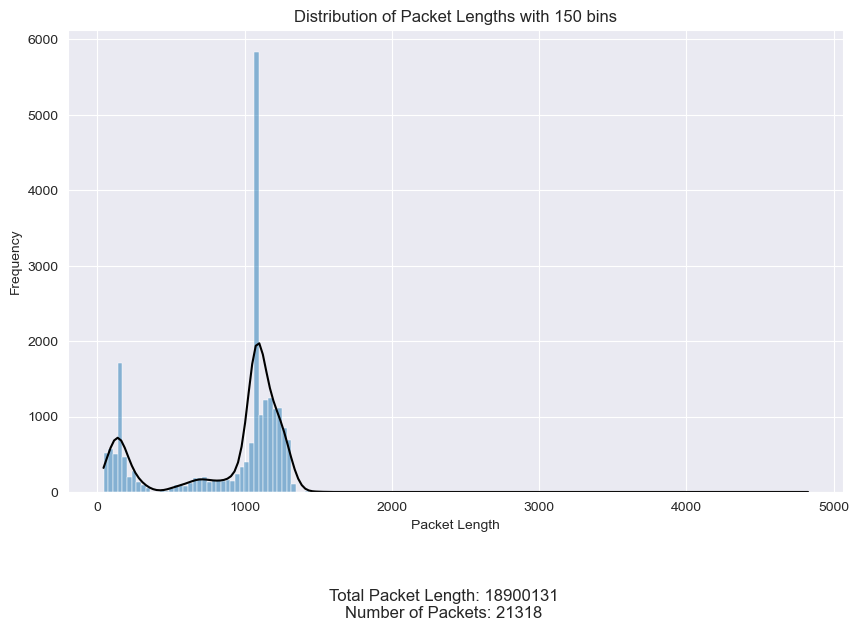

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace infinite values with NaN
video_conference_zoom.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Calculate the total sum of packet lengths and the number of packets
total_packet_length = video_conference_zoom['Length'].sum()
number_of_packets = video_conference_zoom['Length'].count()

# Create the histogram with KDE
plt.figure(figsize=(10, 6))
ax = sns.histplot(video_conference_zoom['Length'], bins=150, kde=True)

# Set the color of the KDE line to black
for line in ax.lines:
    line.set_color('black')

plt.title('Distribution of Packet Lengths with 150 bins')
plt.xlabel('Packet Length')
plt.ylabel('Frequency')

# Add text below the plot
plt.figtext(0.5, -0.1, f'Total Packet Length: {int(total_packet_length)}\nNumber of Packets: {number_of_packets}',
            ha='center', fontsize=12)

plt.show()

We can see that the most packets are between 1000-1500 bytes, which might be the video and audio data packets, and there are some packets with a length of 0 bytes, which might be ACK packets or other control packets.

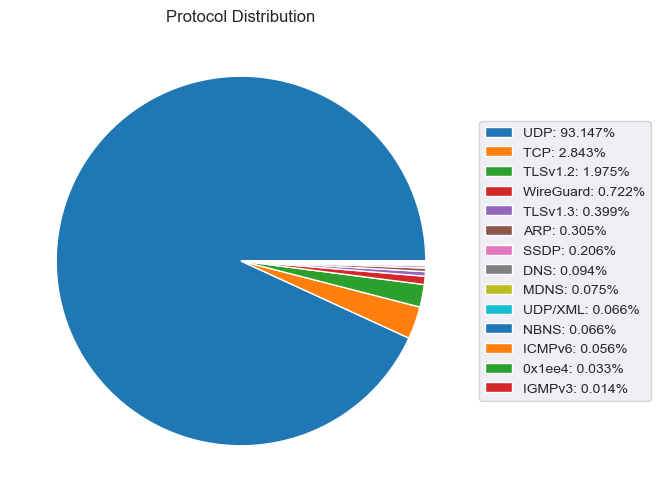

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate protocol counts and their percentages
protocol_counts = video_conference_zoom['Protocol'].value_counts()
protocol_percentages = protocol_counts / protocol_counts.sum() * 100

# Sort the protocol counts by percentage
sorted_protocols = protocol_percentages.sort_values(ascending=False)

# Create the pie chart
plt.figure(figsize=(10, 6))
ax = sorted_protocols.plot.pie(autopct=None, labels=['']*len(sorted_protocols))

# Add a legend with sorted protocol names and percentages
legend_labels = [f'{protocol}: {percentage:.3f}%' for protocol, percentage in sorted_protocols.items()]
ax.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Protocol Distribution')
plt.ylabel('')
plt.show()

We can see that most packets are using UDP protocol that fits to transfer video and audio data, and a small percentage of packets are using TCP protocol that fits to transfer control data.

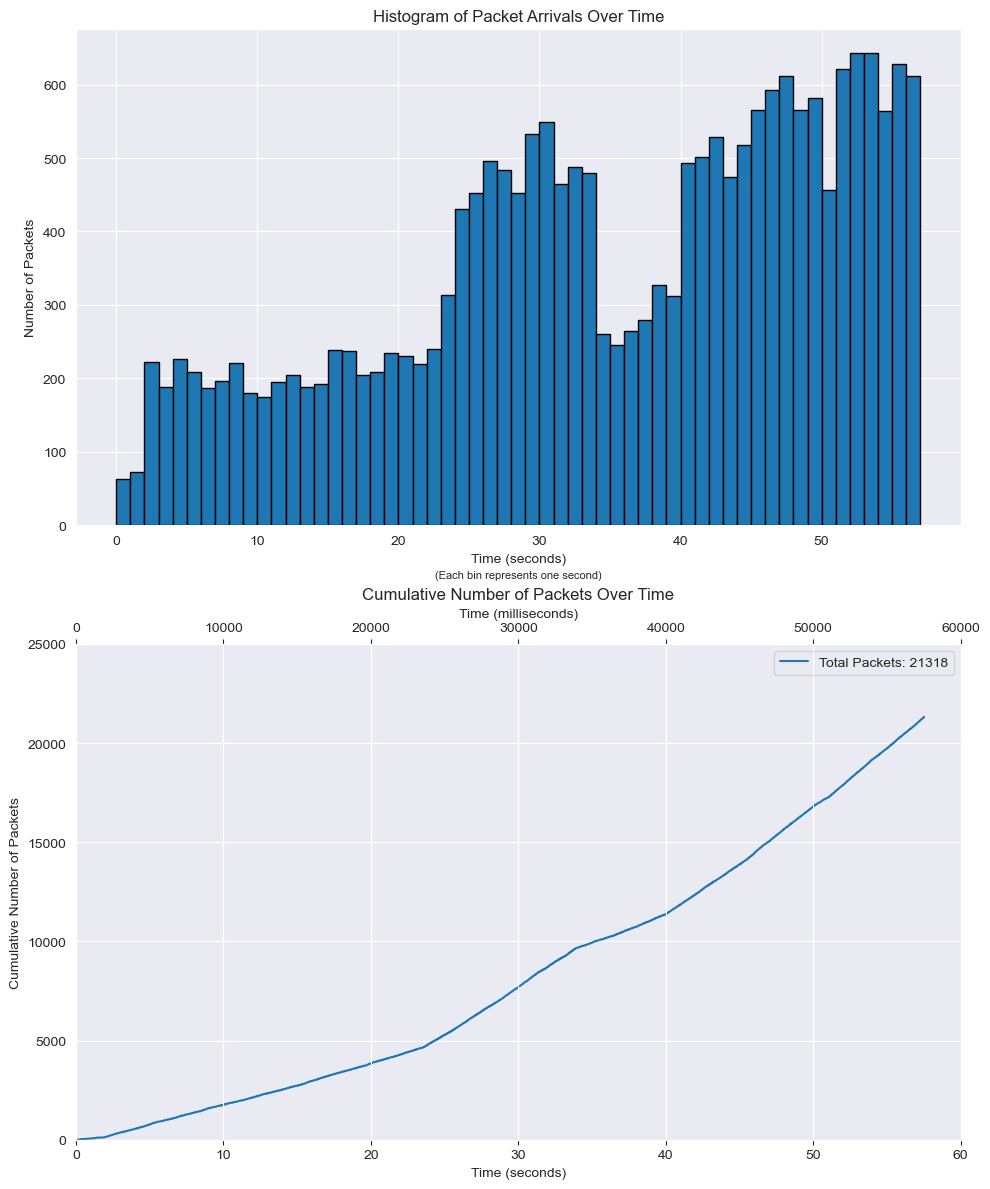

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Time' column is correctly referenced
if 'Time' in video_conference_zoom.columns:
    # Create a copy of the DataFrame for plotting
    plot_data = video_conference_zoom.copy()

    # Set the 'Time' column as the index in the copy
    plot_data.set_index('Time', inplace=True)

    # Convert 'Time' index to milliseconds and seconds
    plot_data['Time_ms'] = plot_data.index.total_seconds() * 1000
    plot_data['Time_s'] = plot_data.index.total_seconds()

    # Sort the index
    plot_data.sort_index(inplace=True)

    # Calculate the cumulative count of packets
    plot_data['Cumulative_Count'] = range(1, len(plot_data) + 1)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # Plot the histogram of packet arrivals with bins of 1 second
    ax1.hist(plot_data['Time_s'], bins=range(0, int(plot_data['Time_s'].max()) + 1), edgecolor='black')
    ax1.set_title('Histogram of Packet Arrivals Over Time')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Number of Packets')
    ax1.text(0.5, -0.1, '(Each bin represents one second)', ha='center', va='center', transform=ax1.transAxes, fontsize=8)

    # Plot the cumulative count of packets
    ax2.plot(plot_data['Time_s'], plot_data['Cumulative_Count'], label='Cumulative Count')
    ax2.set_title('Cumulative Number of Packets Over Time')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Cumulative Number of Packets')
    ax2.set_xlim(0, 60)
    ax2.set_ylim(0, 25000)
    total_packets = plot_data['Cumulative_Count'].max()
    ax2.legend([f'Total Packets: {total_packets}'])

    # Create a secondary x-axis for milliseconds
    ax2_sec = ax2.twiny()
    ax2_sec.set_xlim(0, 60000)
    ax2_sec.set_xlabel('Time (milliseconds)')

    # Display the plots
    plt.tight_layout()
    plt.show()
else:
    print("The 'Time' column is not found in the DataFrame.")

We can see that the number of packets arrived in each second is not constant, and there are some seconds with a higher number of packets than others, which might be due to the nature of the video conferencing application and the data being transferred.<br>Moreover, we can see that the cumulative number of packets is increasing linearly with sudden increases, which indicates that the packets are arriving at an inconstant rate.

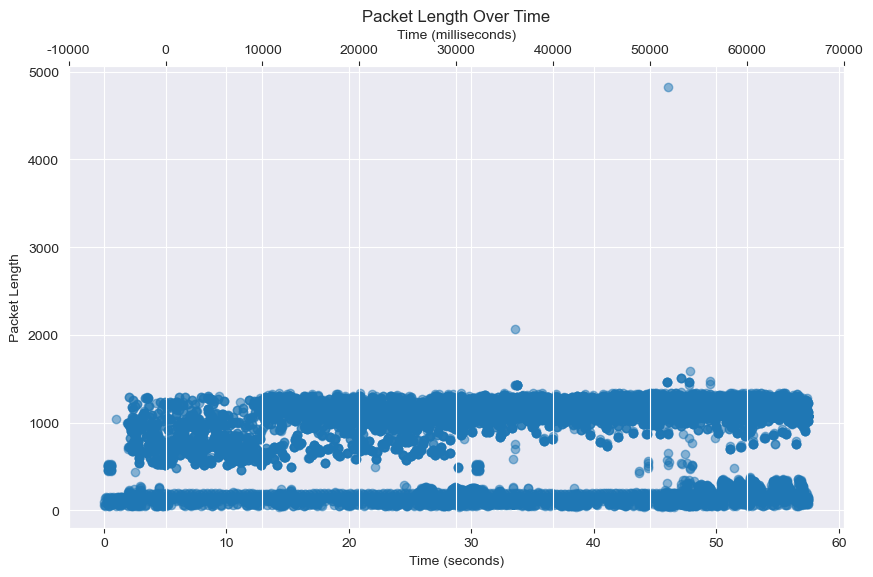

In [50]:
import matplotlib.pyplot as plt

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(video_conference_zoom['Time'].dt.total_seconds(), video_conference_zoom['Length'], alpha=0.5)
plt.title('Packet Length Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Packet Length')

# Create a secondary x-axis for milliseconds
ax1 = plt.gca()
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xlabel('Time (milliseconds)')
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels([int(x * 1000) for x in ax1.get_xticks()])

plt.show()

We can see that the packet length is varying over time, with most packets having a length of around 750-1500 bytes, which might be the video and audio data packets, and there are some packets with a length of 0-500 bytes, which might be ACK packets or other control packets.

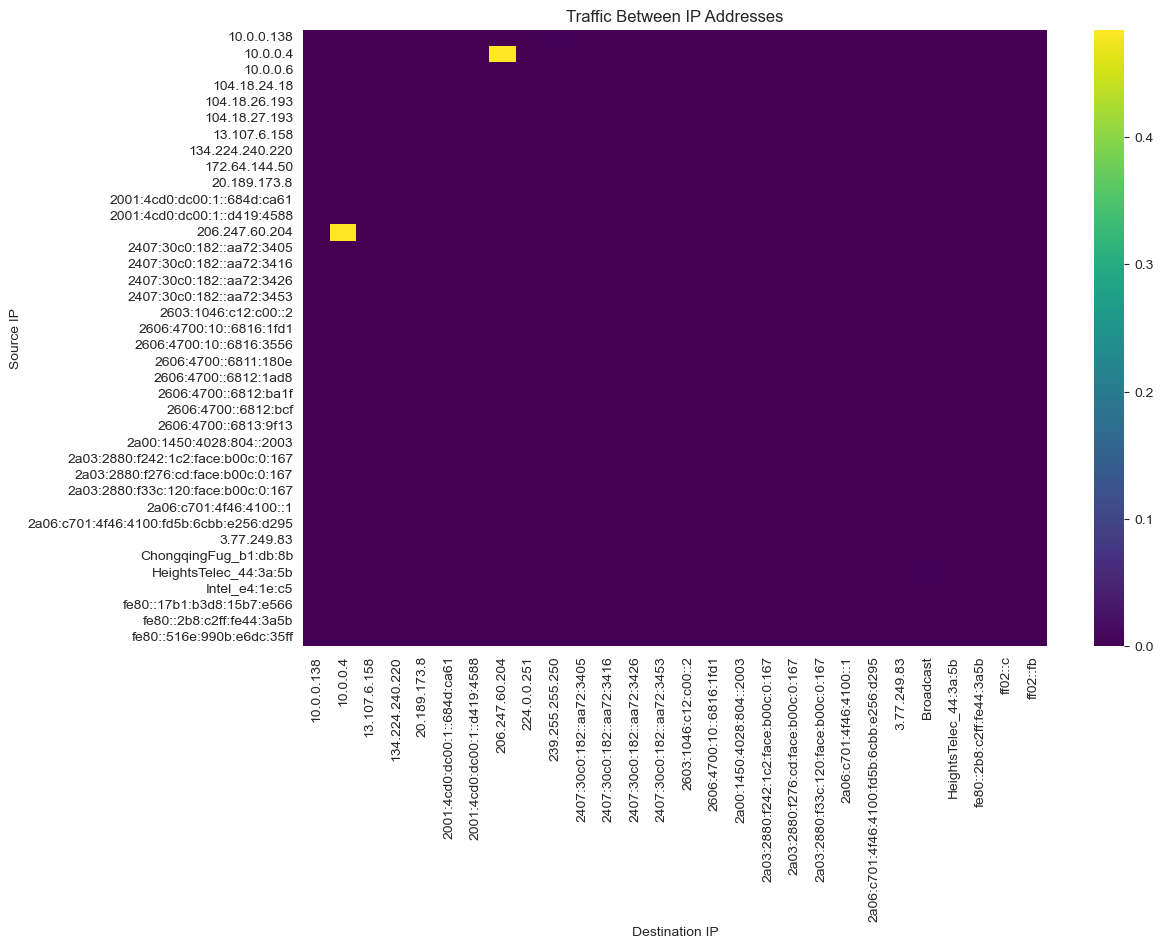

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total traffic
total_traffic = video_conference_zoom.shape[0]

# Create the crosstab
heatmap_data = pd.crosstab(video_conference_zoom['Source'], video_conference_zoom['Destination'])

# Filter out addresses with traffic less than 0.01% of the total
threshold = total_traffic * 0.0001
filtered_heatmap_data = heatmap_data[heatmap_data > threshold].dropna(axis=0, how='all').dropna(axis=1, how='all')

# Calculate the ratio for each cell
ratio_heatmap_data = filtered_heatmap_data / total_traffic

# Fill NaN values with their real ratio
filled_heatmap_data = ratio_heatmap_data.fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filled_heatmap_data, cmap='viridis')
plt.title('Traffic Between IP Addresses')
plt.xlabel('Destination IP')
plt.ylabel('Source IP')
plt.show()

We can see that most of the traffic is between the same source and destination IP addresses, which is what we would expect in a video conferencing scenario where the data is exchanged between two parties.

## Google Meet:

Google Meet is different because we use the browser to connect to the meeting, and the browser is using the TCP protocol instead of the UDP protocol that Zoom is using.

In [52]:
import pandas as pd
from datetime import datetime, timedelta

# Read the CSV file into a DataFrame
video_conference_google_meet = pd.read_csv('video_conferencing_google_meet.csv')

# Convert the 'Time' column to datetime with the correct format
video_conference_google_meet['Time'] = pd.to_datetime(video_conference_google_meet['Time'], format='%Y/%j %H:%M:%S.%f')

# Calculate the time difference from the start of the recording
start_time = video_conference_google_meet['Time'].iloc[0]
video_conference_google_meet['Time'] = video_conference_google_meet['Time'] - start_time

# Convert the time difference to timedelta and format it
video_conference_google_meet['Time'] = video_conference_google_meet['Time'].apply(lambda x: timedelta(seconds=x.total_seconds()))

# Display the updated DataFrame
video_conference_google_meet.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0 days 00:00:00,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2001:4860:4864:6:8000::4,TCP,188,"56583 > 19305 [PSH, ACK] Seq=1 Ack=1 Win=507..."
1,2,0 days 00:00:00.006223,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2001:4860:4864:6:8000::4,TCP,1161,"56583 > 19305 [PSH, ACK] Seq=115 Ack=1 Win=5..."
2,3,0 days 00:00:00.006563,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2001:4860:4864:6:8000::4,TCP,1161,"56583 > 19305 [PSH, ACK] Seq=1202 Ack=1 Win=..."
3,4,0 days 00:00:00.006639,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2001:4860:4864:6:8000::4,TCP,1161,"56583 > 19305 [PSH, ACK] Seq=2289 Ack=1 Win=..."
4,5,0 days 00:00:00.006716,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2001:4860:4864:6:8000::4,TCP,1161,"56583 > 19305 [PSH, ACK] Seq=3376 Ack=1 Win=..."


In [53]:
video_conference_google_meet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39130 entries, 0 to 39129
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   No.          39130 non-null  int64          
 1   Time         39130 non-null  timedelta64[ns]
 2   Source       39130 non-null  object         
 3   Destination  39130 non-null  object         
 4   Protocol     39130 non-null  object         
 5   Length       39130 non-null  int64          
 6   Info         39130 non-null  object         
dtypes: int64(2), object(4), timedelta64[ns](1)
memory usage: 2.1+ MB


C:\Users\brhva\anaconda3\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


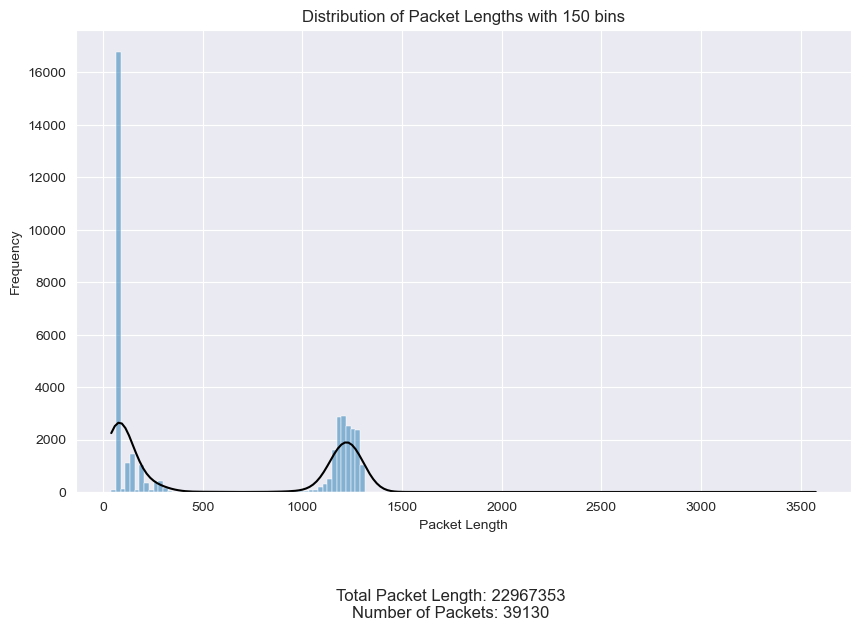

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace infinite values with NaN
video_conference_google_meet.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Calculate the total sum of packet lengths and the number of packets
total_packet_length = video_conference_google_meet['Length'].sum()
number_of_packets = video_conference_google_meet['Length'].count()

# Create the histogram with KDE
plt.figure(figsize=(10, 6))
ax = sns.histplot(video_conference_google_meet['Length'], bins=150, kde=True)

# Set the color of the KDE line to black
for line in ax.lines:
    line.set_color('black')

plt.title('Distribution of Packet Lengths with 150 bins')
plt.xlabel('Packet Length')
plt.ylabel('Frequency')

# Add text below the plot
plt.figtext(0.5, -0.1, f'Total Packet Length: {int(total_packet_length)}\nNumber of Packets: {number_of_packets}',
            ha='center', fontsize=12)

plt.show()

We can see that the distribution of packet lengths is skewed to the left (with length of approximate up to 100 bytes), with a peak around 1000-1500 bytes. The peak around 0 to 100 bytes because the majority of packets contains ACk or small data with ACK.

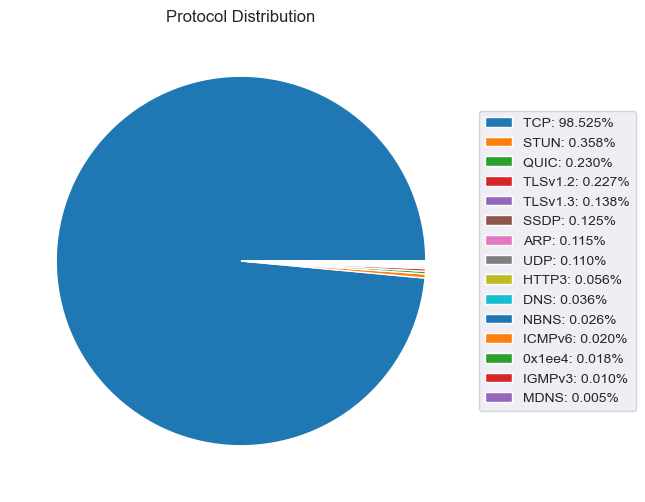

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate protocol counts and their percentages
protocol_counts = video_conference_google_meet['Protocol'].value_counts()
protocol_percentages = protocol_counts / protocol_counts.sum() * 100

# Sort the protocol counts by percentage
sorted_protocols = protocol_percentages.sort_values(ascending=False)

# Create the pie chart
plt.figure(figsize=(10, 6))
ax = sorted_protocols.plot.pie(autopct=None, labels=['']*len(sorted_protocols))

# Add a legend with sorted protocol names and percentages
legend_labels = [f'{protocol}: {percentage:.3f}%' for protocol, percentage in sorted_protocols.items()]
ax.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Protocol Distribution')
plt.ylabel('')
plt.show()

We can see that most of the packets are using TCP protocol, followed by QUIQ, and a small percentage of packets are using TLS and UDP protocols (we Ignore from the other protocols that we don't learn about in class) we ignore from STUN protocol because he related to NAT and not to transport data.<br>We think the reason that the most packets are TCP instead of UDP is because google meet is using the Google Chrome browser and the browser itself is using the TCP protocol.

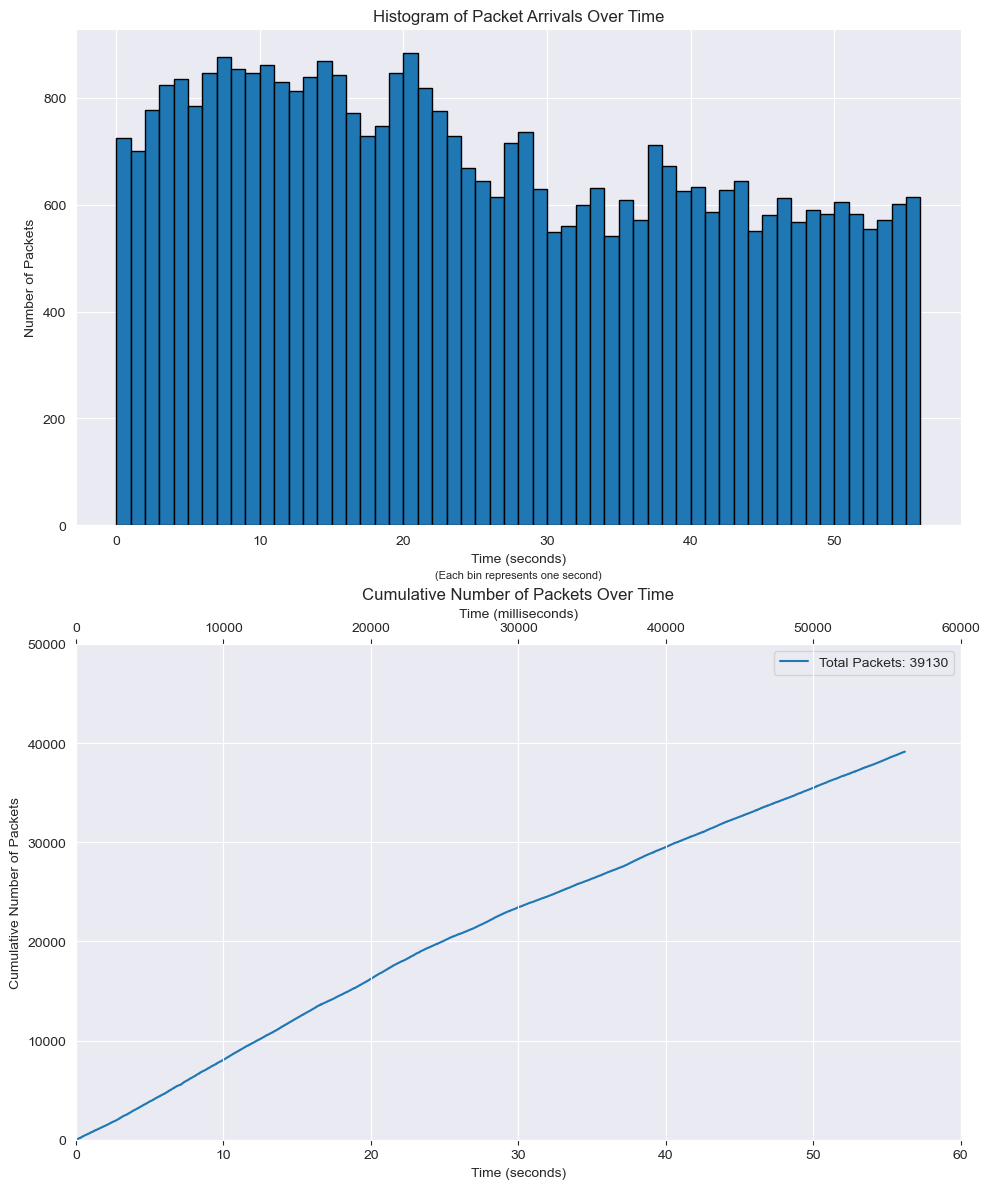

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Time' column is correctly referenced
if 'Time' in video_conference_google_meet.columns:
    # Create a copy of the DataFrame for plotting
    plot_data = video_conference_google_meet.copy()

    # Set the 'Time' column as the index in the copy
    plot_data.set_index('Time', inplace=True)

    # Convert 'Time' index to milliseconds and seconds
    plot_data['Time_ms'] = plot_data.index.total_seconds() * 1000
    plot_data['Time_s'] = plot_data.index.total_seconds()

    # Sort the index
    plot_data.sort_index(inplace=True)

    # Calculate the cumulative count of packets
    plot_data['Cumulative_Count'] = range(1, len(plot_data) + 1)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # Plot the histogram of packet arrivals with bins of 1 second
    ax1.hist(plot_data['Time_s'], bins=range(0, int(plot_data['Time_s'].max()) + 1), edgecolor='black')
    ax1.set_title('Histogram of Packet Arrivals Over Time')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Number of Packets')
    ax1.text(0.5, -0.1, '(Each bin represents one second)', ha='center', va='center', transform=ax1.transAxes, fontsize=8)

    # Plot the cumulative count of packets
    ax2.plot(plot_data['Time_s'], plot_data['Cumulative_Count'], label='Cumulative Count')
    ax2.set_title('Cumulative Number of Packets Over Time')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Cumulative Number of Packets')
    ax2.set_xlim(0, 60)
    ax2.set_ylim(0, 50000)
    total_packets = plot_data['Cumulative_Count'].max()
    ax2.legend([f'Total Packets: {total_packets}'])

    # Create a secondary x-axis for milliseconds
    ax2_sec = ax2.twiny()
    ax2_sec.set_xlim(0, 60000)
    ax2_sec.set_xlabel('Time (milliseconds)')

    # Display the plots
    plt.tight_layout()
    plt.show()
else:
    print("The 'Time' column is not found in the DataFrame.")

- We can see that every sec in the histogram that the number of packets arrived in the first 20 seconds is higher than the other seconds, but overall every second we received approximate the same amount of packages. (we assume that in the first 20 seconds the connection is established and the data contains data the is not only video and audio data).
- We can also see that the cumulative number of packets is increasing linearly without sudden increases, which indicates that the packets are arriving at a constant rate.

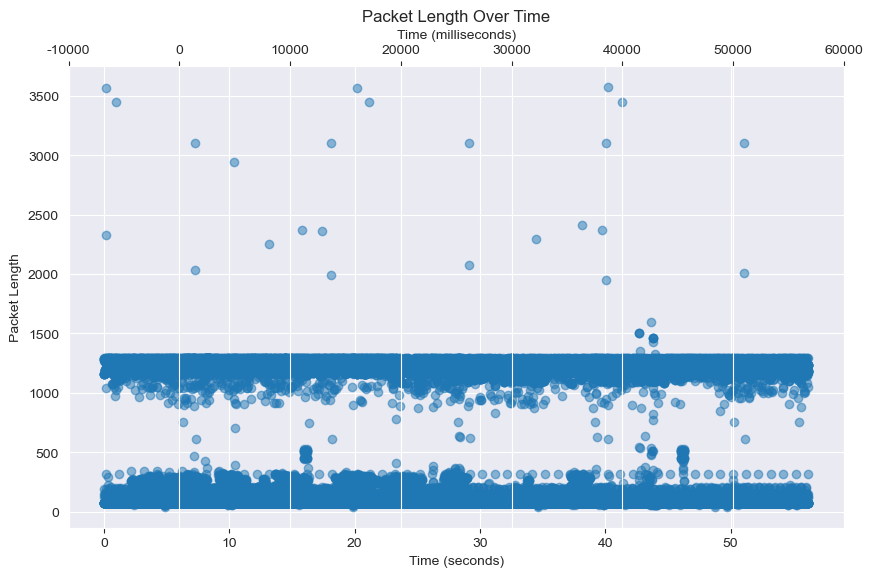

In [57]:
import matplotlib.pyplot as plt

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(video_conference_google_meet['Time'].dt.total_seconds(), video_conference_google_meet['Length'], alpha=0.5)
plt.title('Packet Length Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Packet Length')

# Create a secondary x-axis for milliseconds
ax1 = plt.gca()
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xlabel('Time (milliseconds)')
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels([int(x * 1000) for x in ax1.get_xticks()])

plt.show()

- We can see that the packet length is varying over time, with most packets having a length of around 100-500 or 1000-1500 bytes. The packet lengths are not constant, and there are variations in the lengths of the packets received over time.
- Moreover, we can see that there are a lot of packets with a length of 0 bytes, which might be ACK packets or other control packets, and a lot of packets with a length of approximate 1300 bytes, which might be packets full of data and there are some packets with a length of more than 1500 bytes which might be packets that not fragmented.

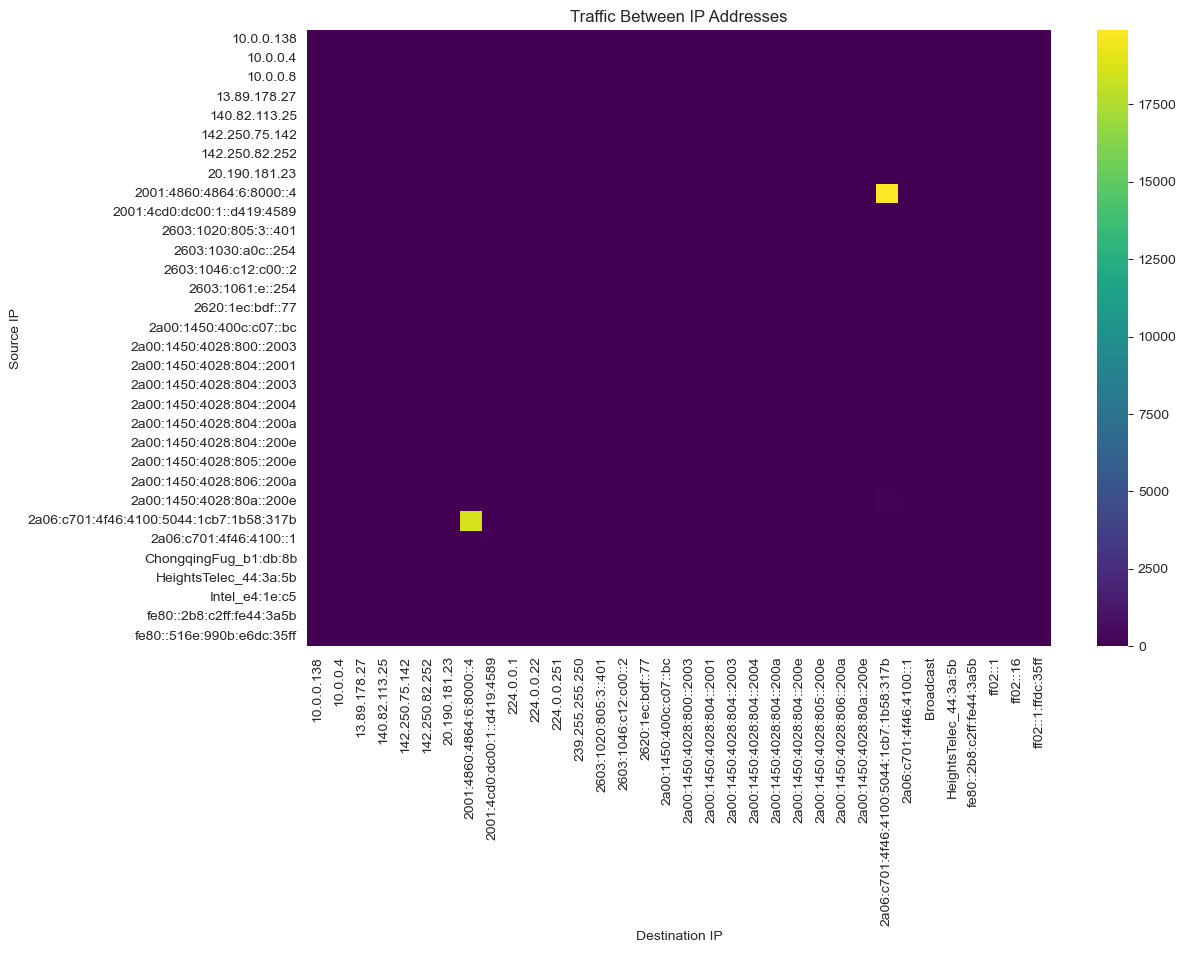

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap
heatmap_data = pd.crosstab(video_conference_google_meet['Source'], video_conference_google_meet['Destination'])
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Traffic Between IP Addresses')
plt.xlabel('Destination IP')
plt.ylabel('Source IP')
plt.show()

We can see that most of the traffic is between the same source and destination IP addresses, which is what we would expect in a video conferencing scenario where the data is exchanged between two parties.

## Video Streaming:

For video streaming, we will analyze the video streaming data from YouTube using Google Chrome browser.<br> While recording I watch one video and then watch another video and stop the recording in the middle of the second video.

In [59]:
import pandas as pd
from datetime import datetime, timedelta

# Read the CSV file into a DataFrame
video_streaming_youtube = pd.read_csv('video_streaming_youtube.csv')

# Convert the 'Time' column to datetime with the correct format
video_streaming_youtube['Time'] = pd.to_datetime(video_streaming_youtube['Time'], format='%Y/%j %H:%M:%S.%f')

# Calculate the time difference from the start of the recording
start_time = video_streaming_youtube['Time'].iloc[0]
video_streaming_youtube['Time'] = video_streaming_youtube['Time'] - start_time

# Convert the time difference to timedelta and format it
video_streaming_youtube['Time'] = video_streaming_youtube['Time'].apply(lambda x: timedelta(seconds=x.total_seconds()))

# Display the updated DataFrame
video_streaming_youtube.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0 days 00:00:00,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2a00:1450:4028:800::2016,UDP,249,51741 > 443 Len=187
1,2,0 days 00:00:00.007886,2a06:c700:2002:b:face:b00c:3333:7020,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,TLSv1.2,113,Application Data
2,3,0 days 00:00:00.007952,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2a06:c700:2002:b:face:b00c:3333:7020,TCP,74,52967 > 443 [ACK] Seq=1 Ack=40 Win=1021 Len=0
3,4,0 days 00:00:00.009458,2a00:1450:4028:800::2016,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,UDP,1287,443 > 51741 Len=1225
4,5,0 days 00:00:00.009458,2a00:1450:4028:800::2016,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,UDP,1292,443 > 51741 Len=1230


In [60]:
video_streaming_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24723 entries, 0 to 24722
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   No.          24723 non-null  int64          
 1   Time         24723 non-null  timedelta64[ns]
 2   Source       24723 non-null  object         
 3   Destination  24723 non-null  object         
 4   Protocol     24723 non-null  object         
 5   Length       24723 non-null  int64          
 6   Info         24723 non-null  object         
dtypes: int64(2), object(4), timedelta64[ns](1)
memory usage: 1.3+ MB


In [61]:
video_streaming_youtube.describe()

,No.,Time,Length
count,24723.000000,24723,24723.000000
mean,12362.000000,0 days 00:02:03.694687491,1037.624479
std,7137.059689,0 days 00:01:24.018235577,494.855177
min,1.000000,0 days 00:00:00,42.000000
25%,6181.500000,0 days 00:00:35.853801500,1292.000000
50%,12362.000000,0 days 00:02:31.769176,1292.000000
75%,18542.500000,0 days 00:03:20.398799,1292.000000
max,24723.000000,0 days 00:04:06.716890,13468.000000


We can see that almost all the segments length is 1292 bytes.

C:\Users\brhva\anaconda3\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


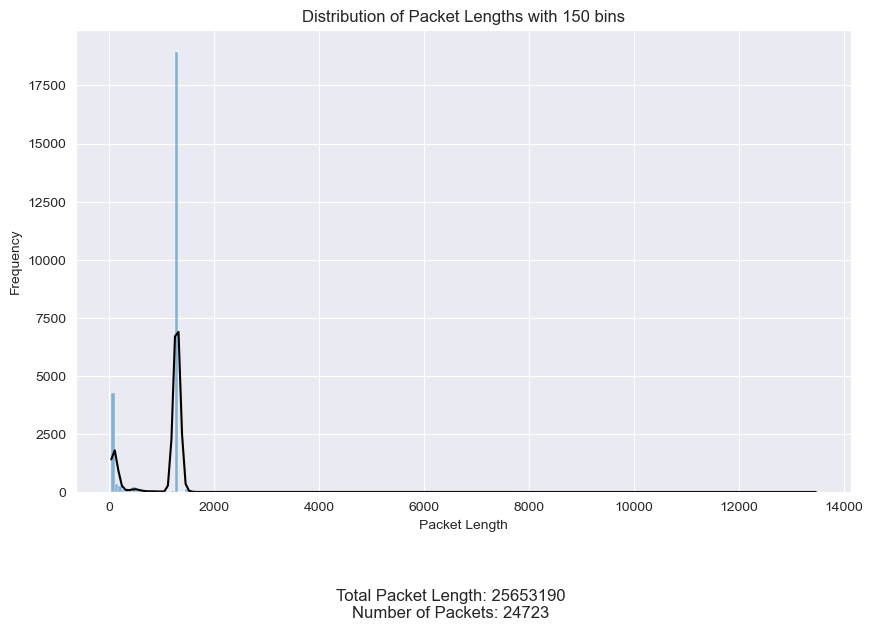

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace infinite values with NaN
video_streaming_youtube.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Calculate the total sum of packet lengths and the number of packets
total_packet_length = video_streaming_youtube['Length'].sum()
number_of_packets = video_streaming_youtube['Length'].count()

# Create the histogram with KDE
plt.figure(figsize=(10, 6))
ax = sns.histplot(video_streaming_youtube['Length'], bins=200, kde=True)

# Set the color of the KDE line to black
for line in ax.lines:
    line.set_color('black')

plt.title('Distribution of Packet Lengths with 150 bins')
plt.xlabel('Packet Length')
plt.ylabel('Frequency')

# Add text below the plot
plt.figtext(0.5, -0.1, f'Total Packet Length: {int(total_packet_length)}\nNumber of Packets: {number_of_packets}',
            ha='center', fontsize=12)

plt.show()

We already saw that almost all the data has length of 1292 so we expected to see it in the histogram, and we see that more than 17500 packets from total of 24723 packets have aprooximate length of 1292 bytes.

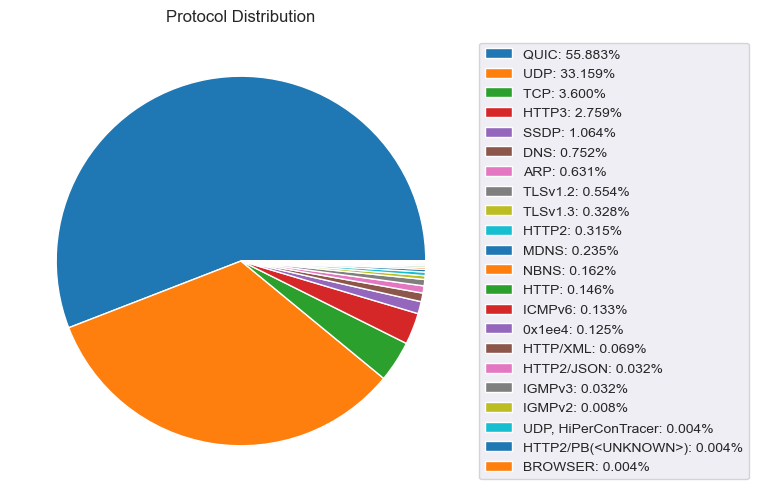

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate protocol counts and their percentages
protocol_counts = video_streaming_youtube['Protocol'].value_counts()
protocol_percentages = protocol_counts / protocol_counts.sum() * 100

# Sort the protocol counts by percentage
sorted_protocols = protocol_percentages.sort_values(ascending=False)

# Create the pie chart
plt.figure(figsize=(10, 6))
ax = sorted_protocols.plot.pie(autopct=None, labels=['']*len(sorted_protocols))

# Add a legend with sorted protocol names and percentages
legend_labels = [f'{protocol}: {percentage:.3f}%' for protocol, percentage in sorted_protocols.items()]
ax.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Protocol Distribution')
plt.ylabel('')
plt.show()

We see that YouTube use mostly in QUIQ and UDP, and a little TCP. QUIQ is protocol to send reliable data and solve some problems of TCP. We should think that YouTube that send video streaming will use UDP f most of its data, I found article that explain why YouTUbe uses TCP in its transport layer [in this link](https://www.geeksforgeeks.org/why-is-youtube-using-tcp-but-not-udp/), and because the article is from 2021 I assume that YouTube now uses QUIQ instead of TCP. <br> YouTube also uses UDP because they use `RTSP` protocol and this protocol use UDP and TCP, that's why we see UDP and QUIQ in large percentage.

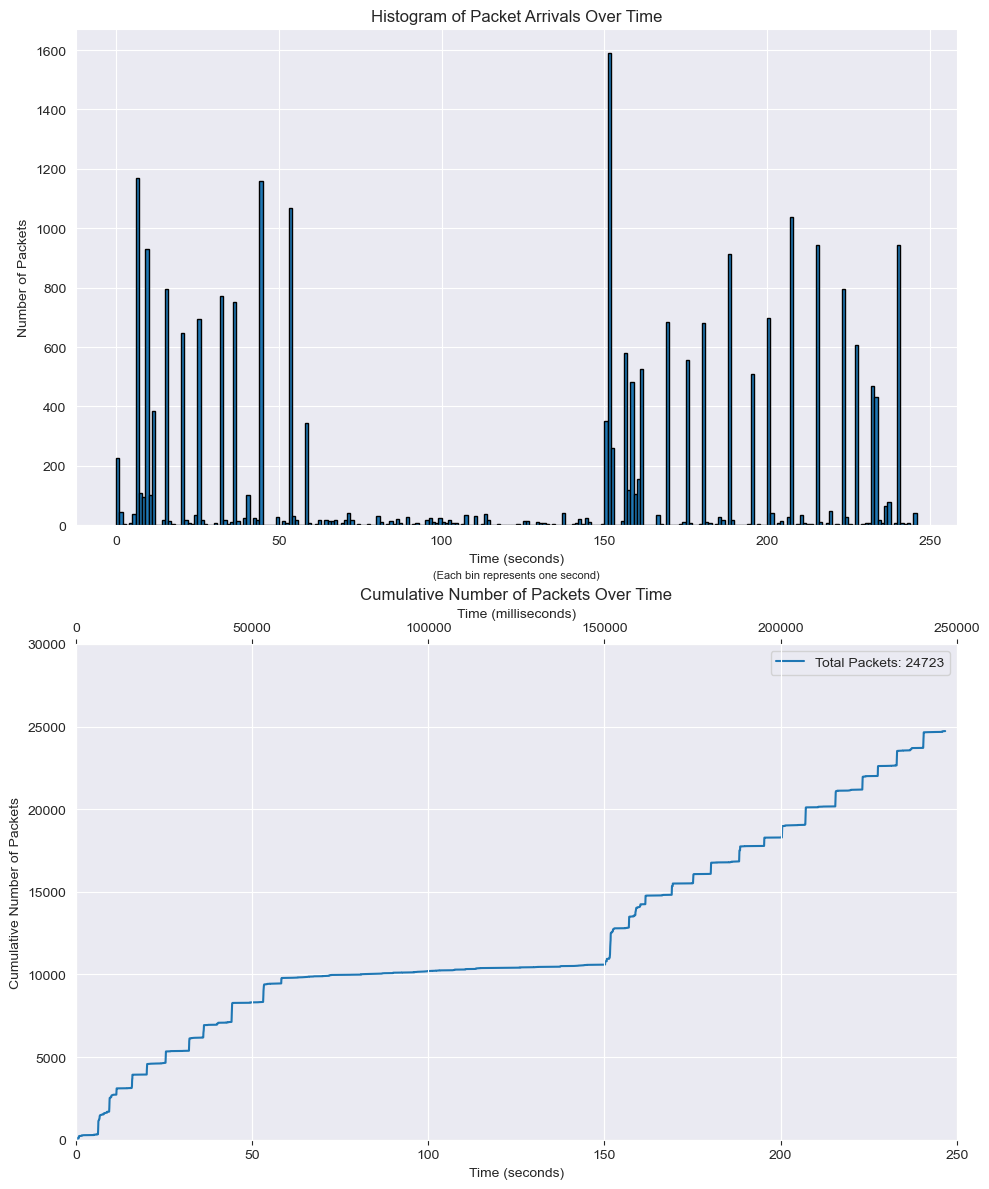

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Time' column is correctly referenced
if 'Time' in video_streaming_youtube.columns:
    # Create a copy of the DataFrame for plotting
    plot_data = video_streaming_youtube.copy()

    # Set the 'Time' column as the index in the copy
    plot_data.set_index('Time', inplace=True)

    # Convert 'Time' index to milliseconds and seconds
    plot_data['Time_ms'] = plot_data.index.total_seconds() * 1000
    plot_data['Time_s'] = plot_data.index.total_seconds()

    # Sort the index
    plot_data.sort_index(inplace=True)

    # Calculate the cumulative count of packets
    plot_data['Cumulative_Count'] = range(1, len(plot_data) + 1)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # Plot the histogram of packet arrivals with bins of 1 second
    ax1.hist(plot_data['Time_s'], bins=range(0, int(plot_data['Time_s'].max()) + 1), edgecolor='black')
    ax1.set_title('Histogram of Packet Arrivals Over Time')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Number of Packets')
    ax1.text(0.5, -0.1, '(Each bin represents one second)', ha='center', va='center', transform=ax1.transAxes, fontsize=8)

    # Plot the cumulative count of packets
    ax2.plot(plot_data['Time_s'], plot_data['Cumulative_Count'], label='Cumulative Count')
    ax2.set_title('Cumulative Number of Packets Over Time')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Cumulative Number of Packets')
    ax2.set_xlim(0, 250)
    ax2.set_ylim(0, 30000)
    total_packets = plot_data['Cumulative_Count'].max()
    ax2.legend([f'Total Packets: {total_packets}'])

    # Create a secondary x-axis for milliseconds
    ax2_sec = ax2.twiny()
    ax2_sec.set_xlim(0, 250000)
    ax2_sec.set_xlabel('Time (milliseconds)')

    # Display the plots
    plt.tight_layout()
    plt.show()
else:
    print("The 'Time' column is not found in the DataFrame.")

We can see the regular pulses of data that we know from class (the steps in the second graph) and we see a long pause in the sending data, in this time the first video will finish to send his data, and we see jump when I load the new video and return to regular transfer data as we know it.

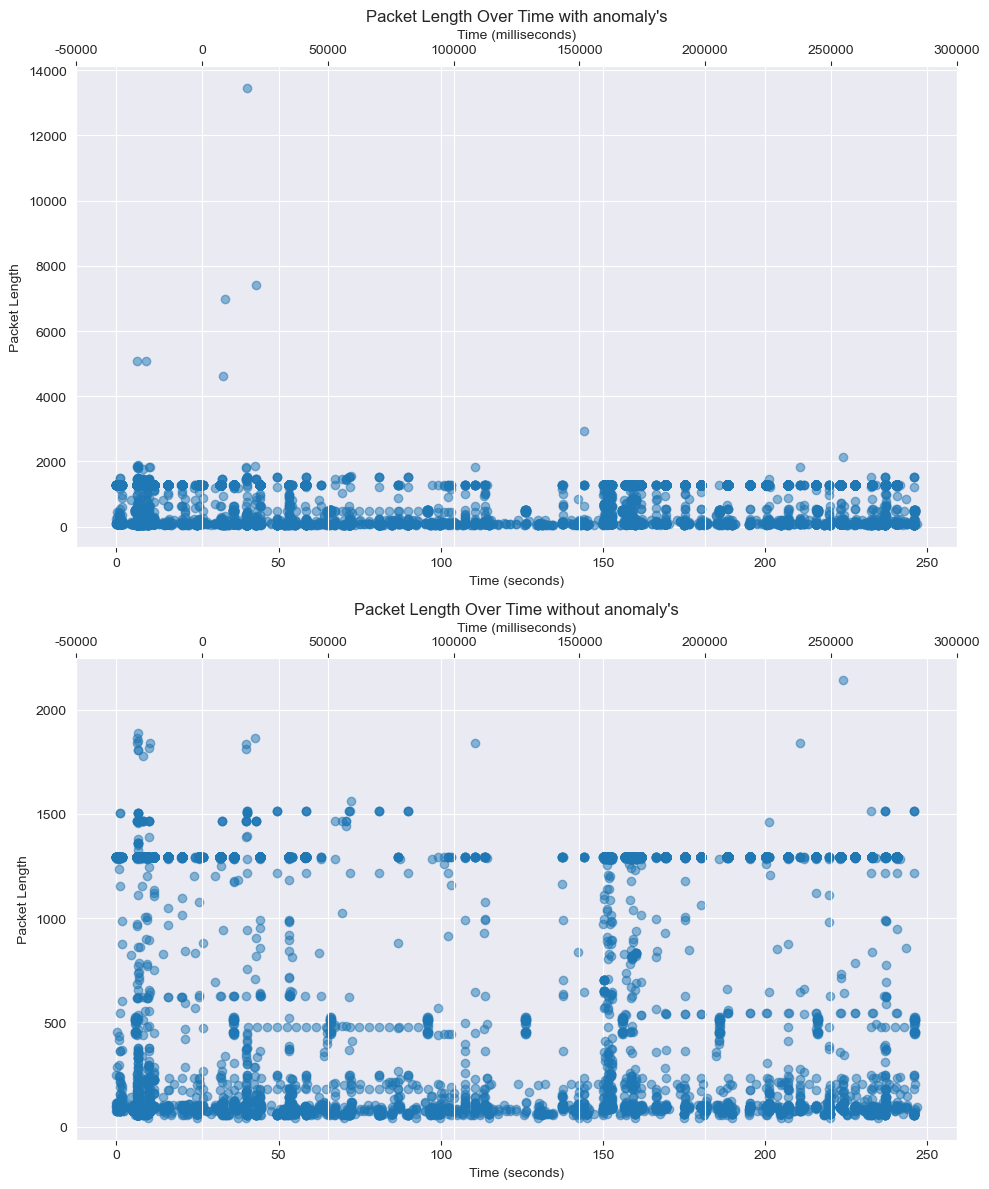

In [65]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Scatter Plot for all data
ax1.scatter(video_streaming_youtube['Time'].dt.total_seconds(), video_streaming_youtube['Length'], alpha=0.5)
ax1.set_title("Packet Length Over Time with anomaly's")
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Packet Length')

# Create a secondary x-axis for milliseconds
ax1_sec = ax1.twiny()
ax1_sec.set_xlim(ax1.get_xlim())
ax1_sec.set_xlabel('Time (milliseconds)')
ax1_sec.set_xticks(ax1.get_xticks())
ax1_sec.set_xticklabels([int(x * 1000) for x in ax1.get_xticks()])

# Filter data to ignore cases where packet length is larger than 2500
filtered_data = video_streaming_youtube[video_streaming_youtube['Length'] <= 2500]

# Scatter Plot for filtered data
ax2.scatter(filtered_data['Time'].dt.total_seconds(), filtered_data['Length'], alpha=0.5)
ax2.set_title("Packet Length Over Time without anomaly's")
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Packet Length')

# Create a secondary x-axis for milliseconds
ax2_sec = ax2.twiny()
ax2_sec.set_xlim(ax2.get_xlim())
ax2_sec.set_xlabel('Time (milliseconds)')
ax2_sec.set_xticks(ax2.get_xticks())
ax2_sec.set_xticklabels([int(x * 1000) for x in ax2.get_xticks()])

plt.tight_layout()
plt.show()

We can see that without anomaly's the length of the packets varray from 0 to 1292 as we mentioned earlier, the length 1292 is probably received a lot of same length packets at the same time and the dots is on each other because we know that most of the packets is with length of 1292 bytes.

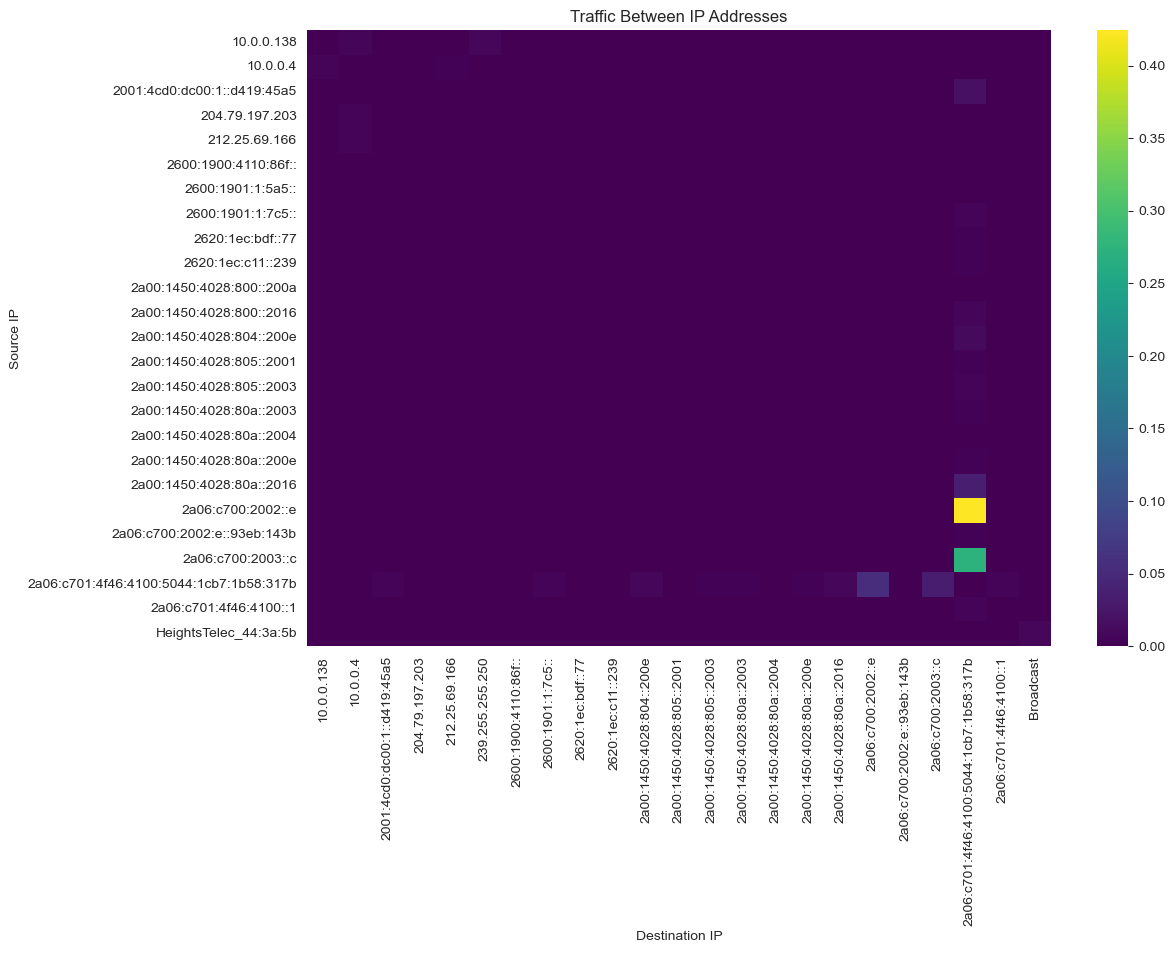

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total traffic
total_traffic = video_streaming_youtube.shape[0]

# Create the crosstab
heatmap_data = pd.crosstab(video_streaming_youtube['Source'], video_streaming_youtube['Destination'])

# Filter out addresses with traffic less than 0.01% of the total
threshold = total_traffic * 0.001
filtered_heatmap_data = heatmap_data[heatmap_data > threshold].dropna(axis=0, how='all').dropna(axis=1, how='all')

# Calculate the ratio for each cell
ratio_heatmap_data = filtered_heatmap_data / total_traffic

# Fill NaN values with their real ratio
filled_heatmap_data = ratio_heatmap_data.fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filled_heatmap_data, cmap='viridis')
plt.title('Traffic Between IP Addresses')
plt.xlabel('Destination IP')
plt.ylabel('Source IP')
plt.show()

We can see that there is some ip source have multiple sources but there is only one major destination (we assume that the other destination was packet that sent from my computer to other destination) and we see that in the other destination this ip is the source.

## Audio Streaming

In this section we record spotify application in computer, we ran a podcast in the application and receive packets.

In [67]:
import pandas as pd
from datetime import datetime, timedelta

# Read the CSV file into a DataFrame
audio_streaming_spotify = pd.read_csv('audio_streaming_spotify.csv')

# Convert the 'Time' column to datetime with the correct format
audio_streaming_spotify['Time'] = pd.to_datetime(audio_streaming_spotify['Time'], format='%Y/%j %H:%M:%S.%f')

# Calculate the time difference from the start of the recording
start_time = audio_streaming_spotify['Time'].iloc[0]
audio_streaming_spotify['Time'] = audio_streaming_spotify['Time'] - start_time

# Convert the time difference to timedelta and format it
audio_streaming_spotify['Time'] = audio_streaming_spotify['Time'].apply(lambda x: timedelta(seconds=x.total_seconds()))

# Display the updated DataFrame
audio_streaming_spotify.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0 days 00:00:00,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2600:1901:1:5a5::,TLSv1.3,1809,Client Hello (SNI=gew1-spclient.spotify.com)
1,2,0 days 00:00:00.000212,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2600:1901:1:5a5::,QUIC,1292,"Initial, DCID=fdfa0b6eebec076a"
2,3,0 days 00:00:00.016050,2600:1901:1:5a5::,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,TCP,74,443 > 52889 [ACK] Seq=1 Ack=1433 Win=1047 Len=0
3,4,0 days 00:00:00.017334,2600:1901:1:5a5::,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,TCP,74,443 > 52889 [ACK] Seq=1 Ack=1736 Win=1046 Len=0
4,5,0 days 00:00:00.018186,2600:1901:1:5a5::,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,QUIC,1292,"Initial, SCID=fdfa0b6eebec076a"


In [68]:
audio_streaming_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10472 entries, 0 to 10471
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   No.          10472 non-null  int64          
 1   Time         10472 non-null  timedelta64[ns]
 2   Source       10472 non-null  object         
 3   Destination  10472 non-null  object         
 4   Protocol     10472 non-null  object         
 5   Length       10472 non-null  int64          
 6   Info         10472 non-null  object         
dtypes: int64(2), object(4), timedelta64[ns](1)
memory usage: 572.8+ KB


In [69]:
audio_streaming_spotify.describe()

,No.,Time,Length
count,10472.000000,10472,10472.000000
mean,5236.500000,0 days 00:00:49.896602028,935.191940
std,3023.150344,0 days 00:00:12.349626819,671.555268
min,1.000000,0 days 00:00:00,42.000000
25%,2618.750000,0 days 00:00:50.468945250,66.000000
50%,5236.500000,0 days 00:00:52.752644,1465.000000
75%,7854.250000,0 days 00:00:54.864761,1465.000000
max,10472.000000,0 days 00:01:14.049202,6400.000000


We can now see that a lot of packets are with length of 1465 bytes.

C:\Users\brhva\anaconda3\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


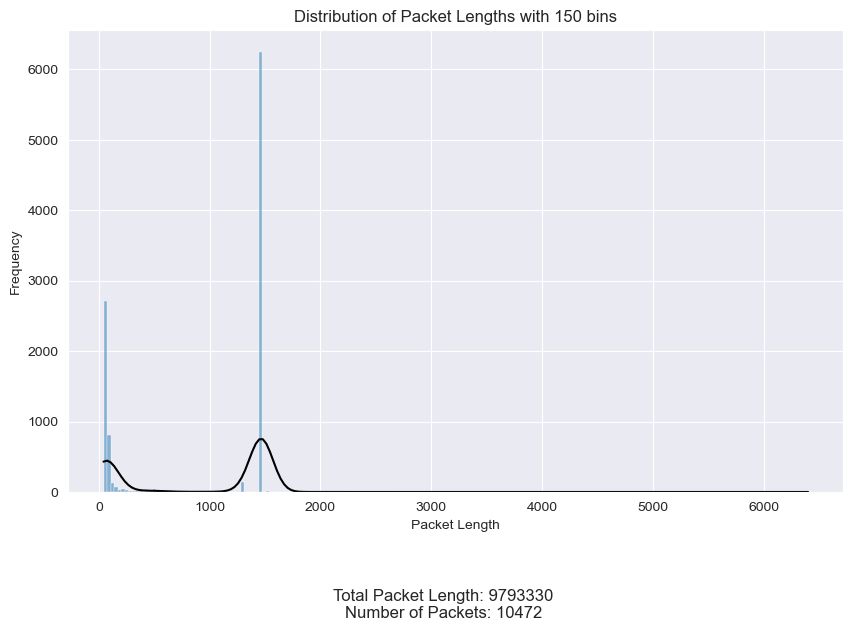

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace infinite values with NaN
audio_streaming_spotify.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Calculate the total sum of packet lengths and the number of packets
total_packet_length = audio_streaming_spotify['Length'].sum()
number_of_packets = audio_streaming_spotify['Length'].count()

# Create the histogram with KDE
plt.figure(figsize=(10, 6))
ax = sns.histplot(audio_streaming_spotify['Length'], bins=200, kde=True)

# Set the color of the KDE line to black
for line in ax.lines:
    line.set_color('black')

plt.title('Distribution of Packet Lengths with 150 bins')
plt.xlabel('Packet Length')
plt.ylabel('Frequency')

# Add text below the plot
plt.figtext(0.5, -0.1, f'Total Packet Length: {int(total_packet_length)}\nNumber of Packets: {number_of_packets}',
            ha='center', fontsize=12)

plt.show()

We can see there is more than 6000 packets with length of 1465 bytes from total of 10472, more than half.

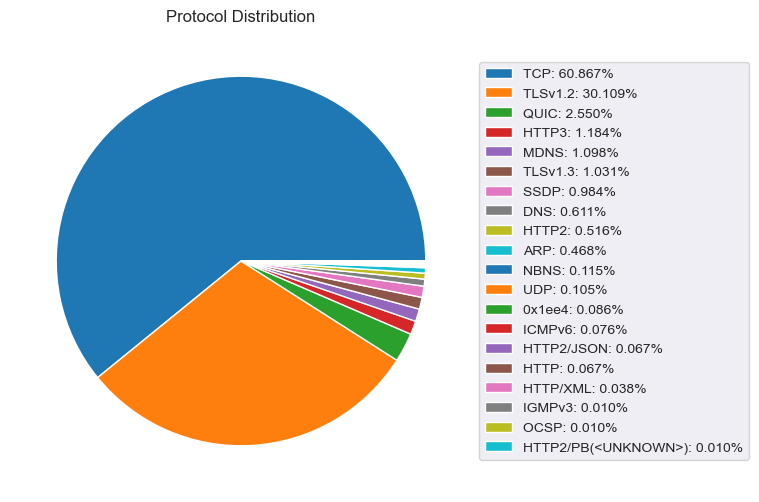

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate protocol counts and their percentages
protocol_counts = audio_streaming_spotify['Protocol'].value_counts()
protocol_percentages = protocol_counts / protocol_counts.sum() * 100

# Sort the protocol counts by percentage
sorted_protocols = protocol_percentages.sort_values(ascending=False)

# Create the pie chart
plt.figure(figsize=(10, 6))
ax = sorted_protocols.plot.pie(autopct=None, labels=['']*len(sorted_protocols))

# Add a legend with sorted protocol names and percentages
legend_labels = [f'{protocol}: {percentage:.3f}%' for protocol, percentage in sorted_protocols.items()]
ax.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Protocol Distribution')
plt.ylabel('')
plt.show()

We see that audio relay on reliable transport (like TCP or QUIQ) instead of unreliable transport (like UDP)

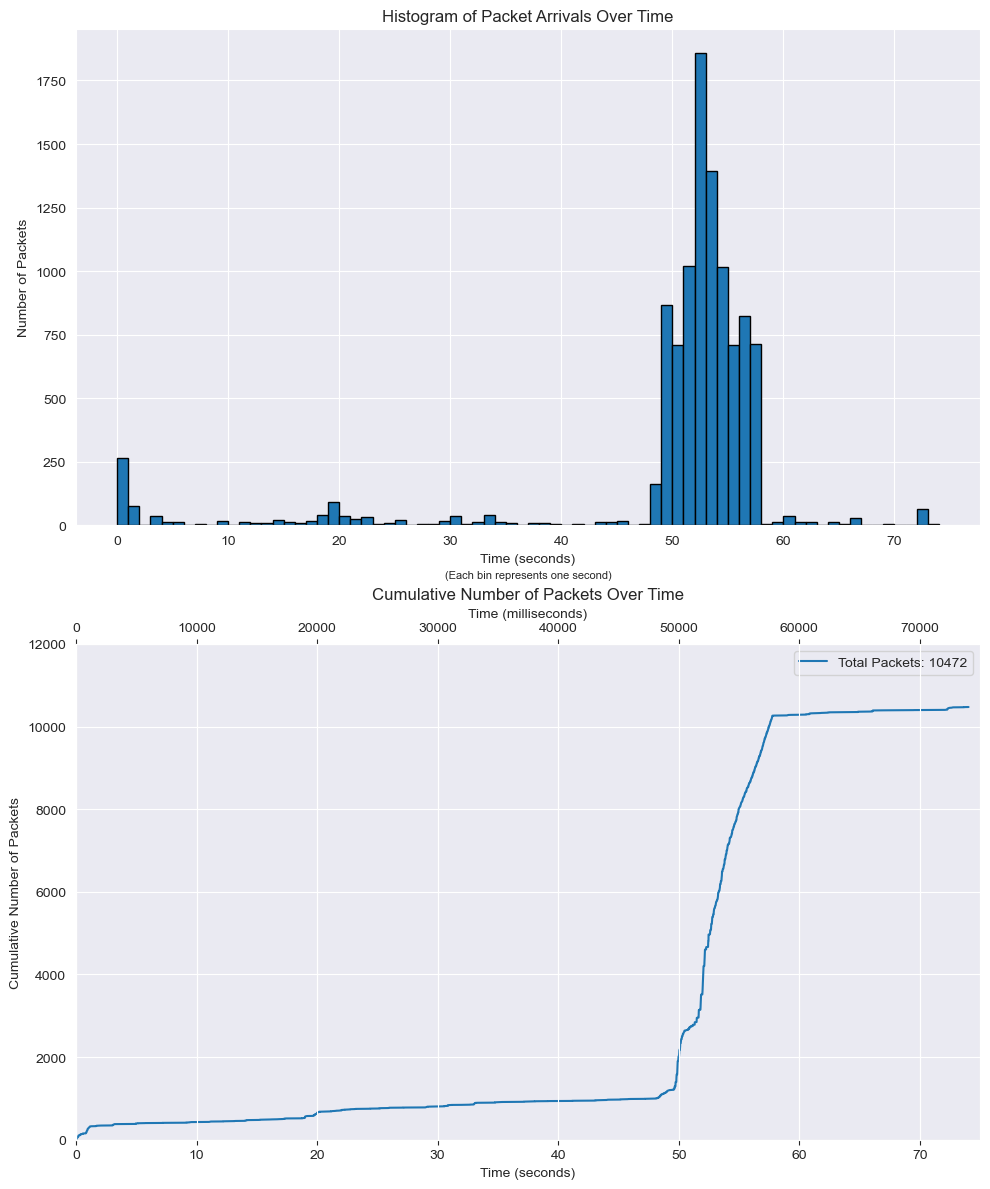

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Time' column is correctly referenced
if 'Time' in audio_streaming_spotify.columns:
    # Create a copy of the DataFrame for plotting
    plot_data = audio_streaming_spotify.copy()

    # Set the 'Time' column as the index in the copy
    plot_data.set_index('Time', inplace=True)

    # Convert 'Time' index to milliseconds and seconds
    plot_data['Time_ms'] = plot_data.index.total_seconds() * 1000
    plot_data['Time_s'] = plot_data.index.total_seconds()

    # Sort the index
    plot_data.sort_index(inplace=True)

    # Calculate the cumulative count of packets
    plot_data['Cumulative_Count'] = range(1, len(plot_data) + 1)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # Plot the histogram of packet arrivals with bins of 1 second
    ax1.hist(plot_data['Time_s'], bins=range(0, int(plot_data['Time_s'].max()) + 1), edgecolor='black')
    ax1.set_title('Histogram of Packet Arrivals Over Time')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Number of Packets')
    ax1.text(0.5, -0.1, '(Each bin represents one second)', ha='center', va='center', transform=ax1.transAxes, fontsize=8)

    # Plot the cumulative count of packets
    ax2.plot(plot_data['Time_s'], plot_data['Cumulative_Count'], label='Cumulative Count')
    ax2.set_title('Cumulative Number of Packets Over Time')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Cumulative Number of Packets')
    ax2.set_xlim(0, 75)
    ax2.set_ylim(0, 12000)
    total_packets = plot_data['Cumulative_Count'].max()
    ax2.legend([f'Total Packets: {total_packets}'])

    # Create a secondary x-axis for milliseconds
    ax2_sec = ax2.twiny()
    ax2_sec.set_xlim(0, 75000)
    ax2_sec.set_xlabel('Time (milliseconds)')

    # Display the plots
    plt.tight_layout()
    plt.show()
else:
    print("The 'Time' column is not found in the DataFrame.")

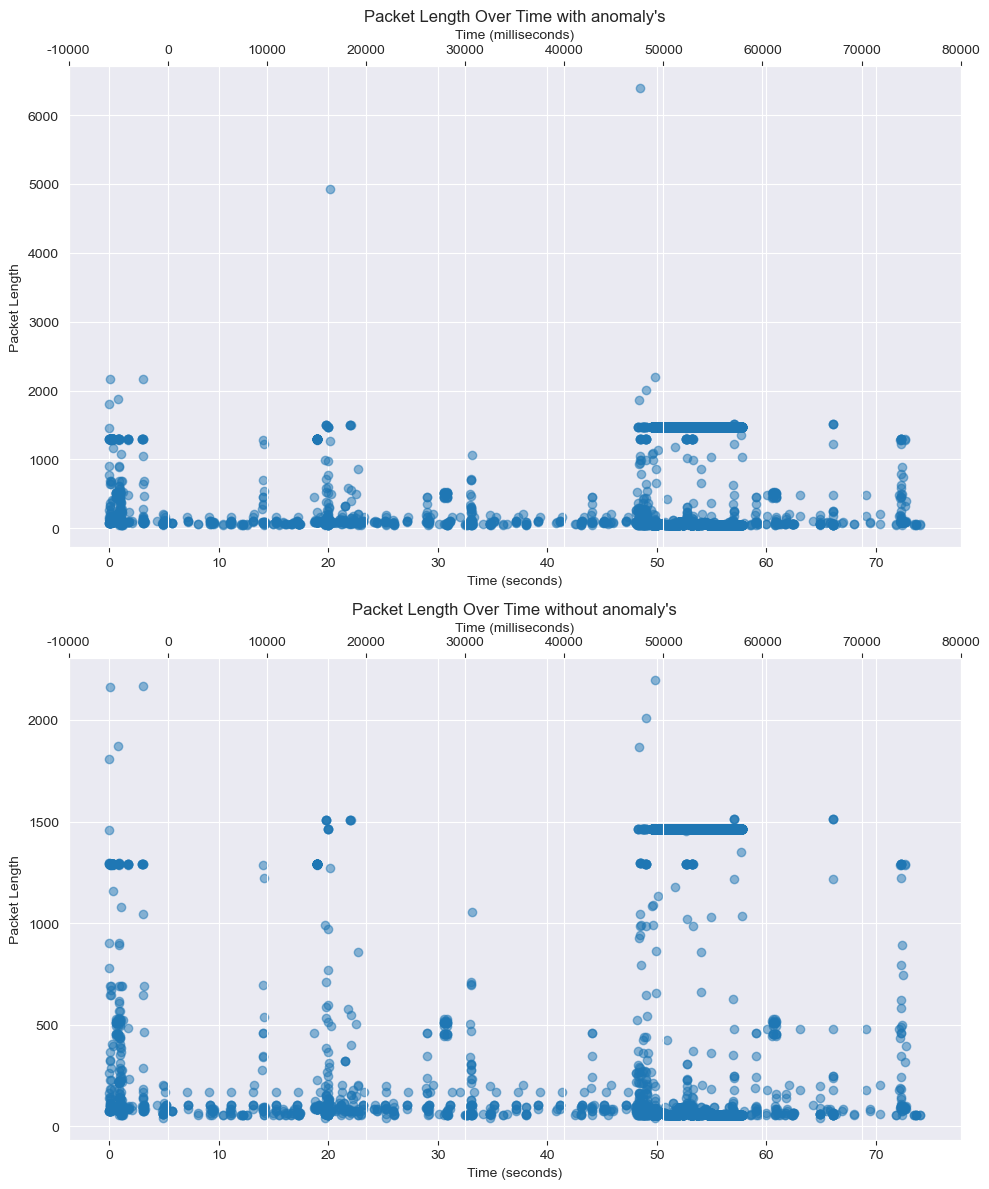

In [73]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Scatter Plot for all data
ax1.scatter(audio_streaming_spotify['Time'].dt.total_seconds(), audio_streaming_spotify['Length'], alpha=0.5)
ax1.set_title("Packet Length Over Time with anomaly's")
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Packet Length')

# Create a secondary x-axis for milliseconds
ax1_sec = ax1.twiny()
ax1_sec.set_xlim(ax1.get_xlim())
ax1_sec.set_xlabel('Time (milliseconds)')
ax1_sec.set_xticks(ax1.get_xticks())
ax1_sec.set_xticklabels([int(x * 1000) for x in ax1.get_xticks()])

# Filter data to ignore cases where packet length is larger than 2500
filtered_data = audio_streaming_spotify[audio_streaming_spotify['Length'] <= 2500]

# Scatter Plot for filtered data
ax2.scatter(filtered_data['Time'].dt.total_seconds(), filtered_data['Length'], alpha=0.5)
ax2.set_title("Packet Length Over Time without anomaly's")
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Packet Length')

# Create a secondary x-axis for milliseconds
ax2_sec = ax2.twiny()
ax2_sec.set_xlim(ax2.get_xlim())
ax2_sec.set_xlabel('Time (milliseconds)')
ax2_sec.set_xticks(ax2.get_xticks())
ax2_sec.set_xticklabels([int(x * 1000) for x in ax2.get_xticks()])

plt.tight_layout()
plt.show()

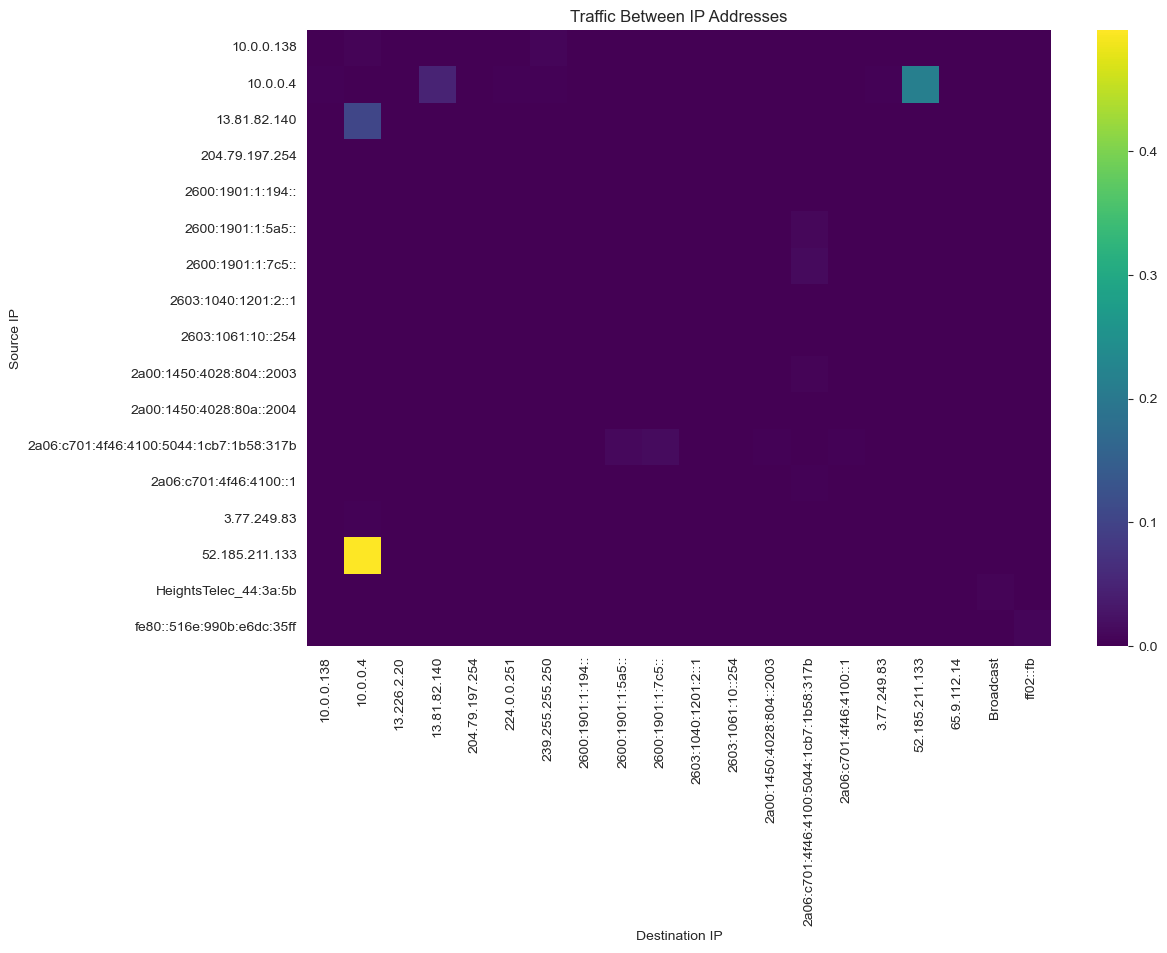

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total traffic
total_traffic = audio_streaming_spotify.shape[0]

# Create the crosstab
heatmap_data = pd.crosstab(audio_streaming_spotify['Source'], audio_streaming_spotify['Destination'])

# Filter out addresses with traffic less than 0.01% of the total
threshold = total_traffic * 0.001
filtered_heatmap_data = heatmap_data[heatmap_data > threshold].dropna(axis=0, how='all').dropna(axis=1, how='all')

# Calculate the ratio for each cell
ratio_heatmap_data = filtered_heatmap_data / total_traffic

# Fill NaN values with their real ratio
filled_heatmap_data = ratio_heatmap_data.fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filled_heatmap_data, cmap='viridis')
plt.title('Traffic Between IP Addresses')
plt.xlabel('Destination IP')
plt.ylabel('Source IP')
plt.show()

## Web browser Chrome:

In [75]:
import pandas as pd
from datetime import datetime, timedelta

# Read the CSV file into a DataFrame
web_surfing_chrome = pd.read_csv('web_surfing_1_chrome.csv')

# Convert the 'Time' column to datetime with the correct format
web_surfing_chrome['Time'] = pd.to_datetime(web_surfing_chrome['Time'], format='%Y/%j %H:%M:%S.%f')

# Calculate the time difference from the start of the recording
start_time = web_surfing_chrome['Time'].iloc[0]
web_surfing_chrome['Time'] = web_surfing_chrome['Time'] - start_time

# Convert the time difference to timedelta and format it
web_surfing_chrome['Time'] = web_surfing_chrome['Time'].apply(lambda x: timedelta(seconds=x.total_seconds()))

# Display the updated DataFrame
web_surfing_chrome.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0 days 00:00:00,HeightsTelec_44:3a:5b,Broadcast,0x1ee4,206,Ethernet II
1,2,0 days 00:00:00.689390,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2a06:c701:4f46:4100::1,DNS,90,Standard query 0xd010 A github.com
2,3,0 days 00:00:00.689392,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2a06:c701:4f46:4100::1,DNS,103,Standard query 0xa6ab A safebrowsing.google.com
3,4,0 days 00:00:00.689810,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2a06:c701:4f46:4100::1,DNS,103,Standard query 0xa536 AAAA safebrowsing.google...
4,5,0 days 00:00:00.690118,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2a06:c701:4f46:4100::1,DNS,90,Standard query 0x16be AAAA github.com


In [76]:
web_surfing_chrome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6994 entries, 0 to 6993
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   No.          6994 non-null   int64          
 1   Time         6994 non-null   timedelta64[ns]
 2   Source       6994 non-null   object         
 3   Destination  6994 non-null   object         
 4   Protocol     6994 non-null   object         
 5   Length       6994 non-null   int64          
 6   Info         6994 non-null   object         
dtypes: int64(2), object(4), timedelta64[ns](1)
memory usage: 382.6+ KB


In [77]:
web_surfing_chrome.describe()

,No.,Time,Length
count,6994.000000,6994,6994.000000
mean,3497.500000,0 days 00:00:23.138665099,656.807120
std,2019.138224,0 days 00:00:10.371630297,1104.918279
min,1.000000,0 days 00:00:00,42.000000
25%,1749.250000,0 days 00:00:16.714548,86.000000
50%,3497.500000,0 days 00:00:21.460082500,139.000000
75%,5245.750000,0 days 00:00:31.954198,1292.000000
max,6994.000000,0 days 00:00:39.697814,16480.000000


C:\Users\brhva\anaconda3\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


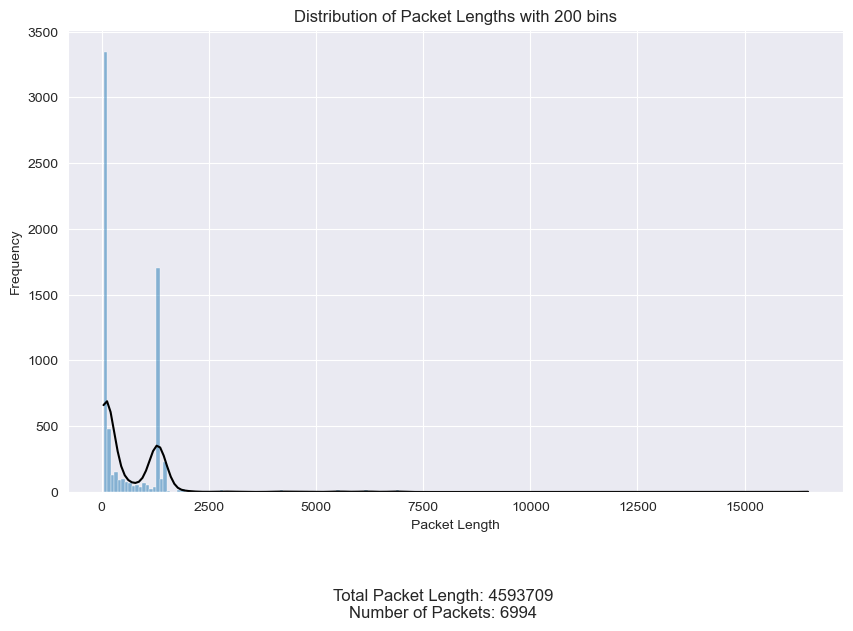

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace infinite values with NaN
web_surfing_chrome.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Calculate the total sum of packet lengths and the number of packets
total_packet_length = web_surfing_chrome['Length'].sum()
number_of_packets = web_surfing_chrome['Length'].count()

# Create the histogram with KDE
plt.figure(figsize=(10, 6))
ax = sns.histplot(web_surfing_chrome['Length'], bins=200, kde=True)

# Set the color of the KDE line to black
for line in ax.lines:
    line.set_color('black')

plt.title('Distribution of Packet Lengths with 200 bins')
plt.xlabel('Packet Length')
plt.ylabel('Frequency')

# Add text below the plot
plt.figtext(0.5, -0.1, f'Total Packet Length: {int(total_packet_length)}\nNumber of Packets: {number_of_packets}',
            ha='center', fontsize=12)

plt.show()

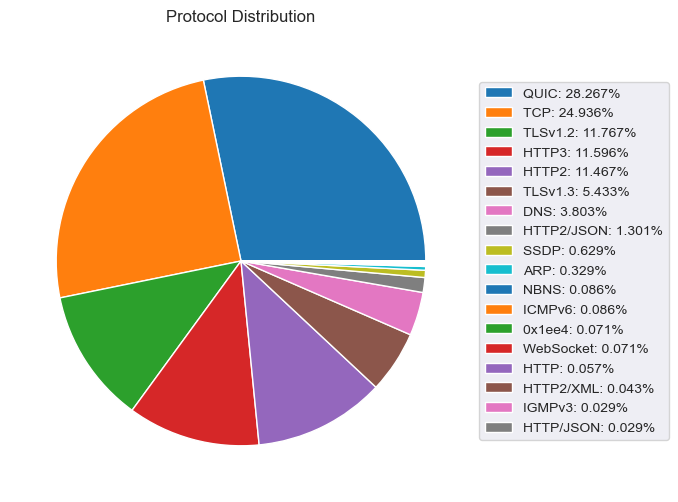

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate protocol counts and their percentages
protocol_counts = web_surfing_chrome['Protocol'].value_counts()
protocol_percentages = protocol_counts / protocol_counts.sum() * 100

# Sort the protocol counts by percentage
sorted_protocols = protocol_percentages.sort_values(ascending=False)

# Create the pie chart
plt.figure(figsize=(10, 6))
ax = sorted_protocols.plot.pie(autopct=None, labels=['']*len(sorted_protocols))

# Add a legend with sorted protocol names and percentages
legend_labels = [f'{protocol}: {percentage:.3f}%' for protocol, percentage in sorted_protocols.items()]
ax.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Protocol Distribution')
plt.ylabel('')
plt.show()

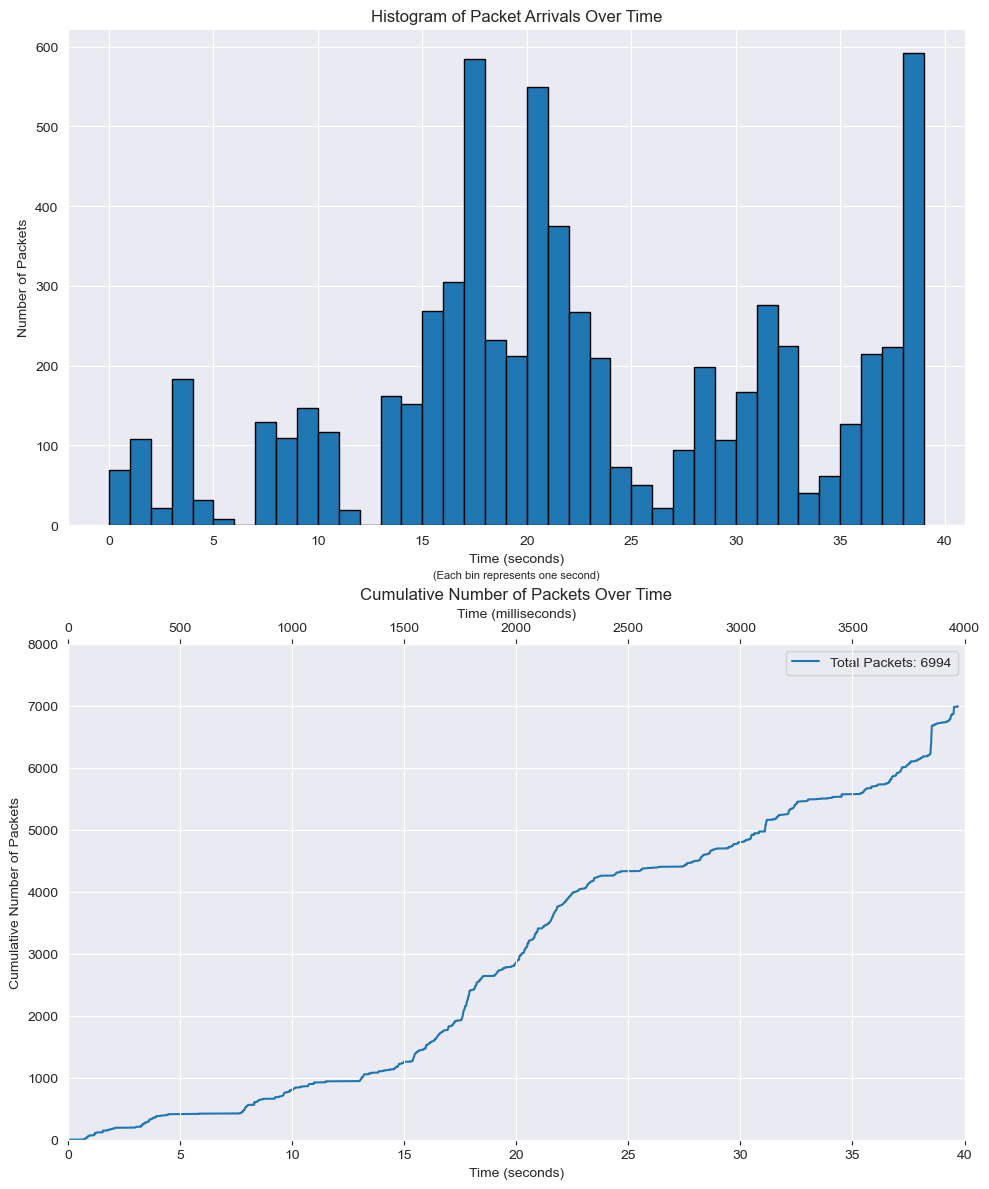

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Time' column is correctly referenced
if 'Time' in web_surfing_chrome.columns:
    # Create a copy of the DataFrame for plotting
    plot_data = web_surfing_chrome.copy()

    # Set the 'Time' column as the index in the copy
    plot_data.set_index('Time', inplace=True)

    # Convert 'Time' index to milliseconds and seconds
    plot_data['Time_ms'] = plot_data.index.total_seconds() * 1000
    plot_data['Time_s'] = plot_data.index.total_seconds()

    # Sort the index
    plot_data.sort_index(inplace=True)

    # Calculate the cumulative count of packets
    plot_data['Cumulative_Count'] = range(1, len(plot_data) + 1)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # Plot the histogram of packet arrivals with bins of 1 second
    ax1.hist(plot_data['Time_s'], bins=range(0, int(plot_data['Time_s'].max()) + 1), edgecolor='black')
    ax1.set_title('Histogram of Packet Arrivals Over Time')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Number of Packets')
    ax1.text(0.5, -0.1, '(Each bin represents one second)', ha='center', va='center', transform=ax1.transAxes, fontsize=8)

    # Plot the cumulative count of packets
    ax2.plot(plot_data['Time_s'], plot_data['Cumulative_Count'], label='Cumulative Count')
    ax2.set_title('Cumulative Number of Packets Over Time')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Cumulative Number of Packets')
    ax2.set_xlim(0, 40)
    ax2.set_ylim(0, 8000)
    total_packets = plot_data['Cumulative_Count'].max()
    ax2.legend([f'Total Packets: {total_packets}'])

    # Create a secondary x-axis for milliseconds
    ax2_sec = ax2.twiny()
    ax2_sec.set_xlim(0, 4000)
    ax2_sec.set_xlabel('Time (milliseconds)')

    # Display the plots
    plt.tight_layout()
    plt.show()
else:
    print("The 'Time' column is not found in the DataFrame.")

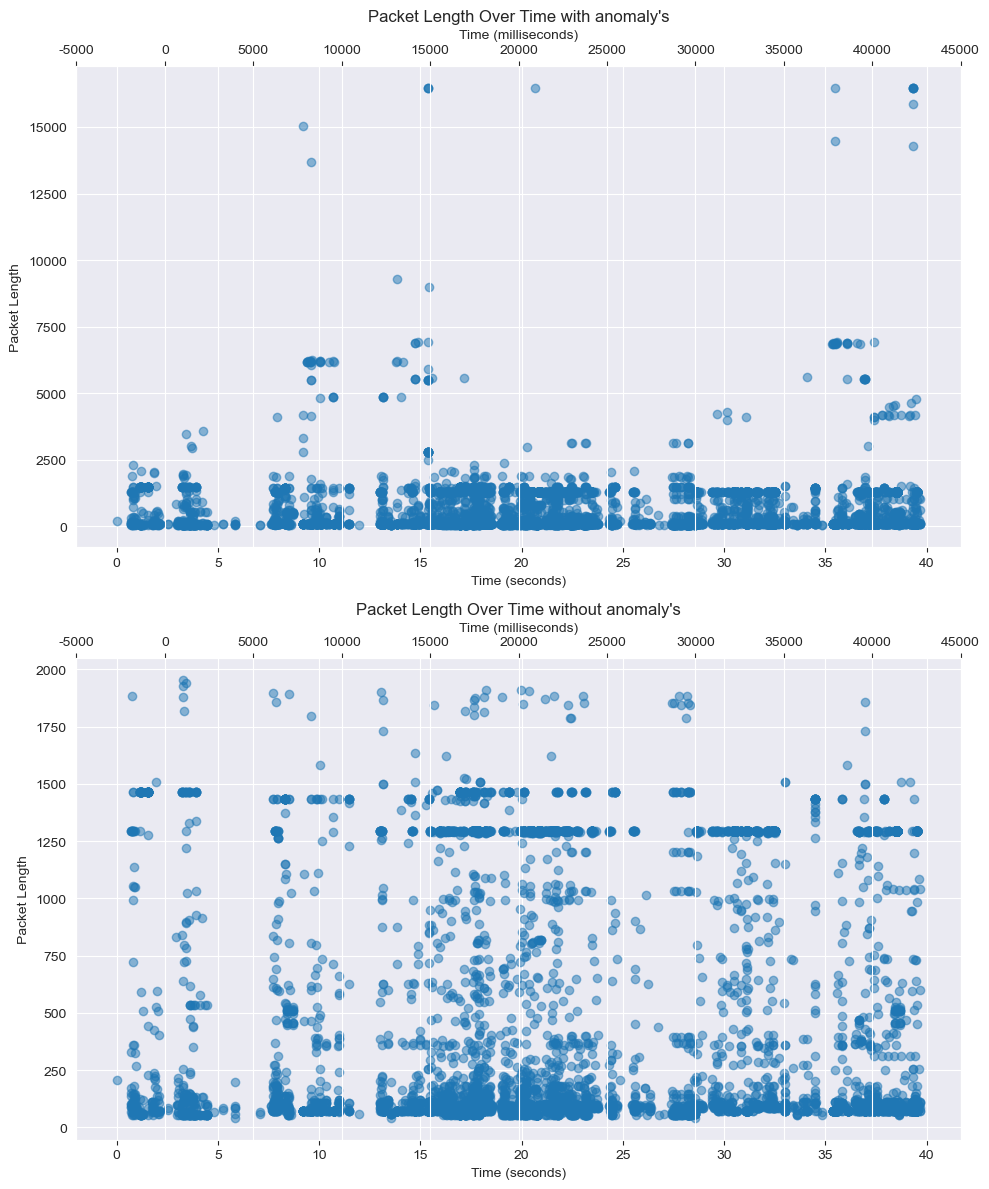

In [84]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Scatter Plot for all data
ax1.scatter(web_surfing_chrome['Time'].dt.total_seconds(), web_surfing_chrome['Length'], alpha=0.5)
ax1.set_title("Packet Length Over Time with anomaly's")
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Packet Length')

# Create a secondary x-axis for milliseconds
ax1_sec = ax1.twiny()
ax1_sec.set_xlim(ax1.get_xlim())
ax1_sec.set_xlabel('Time (milliseconds)')
ax1_sec.set_xticks(ax1.get_xticks())
ax1_sec.set_xticklabels([int(x * 1000) for x in ax1.get_xticks()])

# Filter data to ignore cases where packet length is larger than 2000
filtered_data = web_surfing_chrome[web_surfing_chrome['Length'] <= 2000]

# Scatter Plot for filtered data
ax2.scatter(filtered_data['Time'].dt.total_seconds(), filtered_data['Length'], alpha=0.5)
ax2.set_title("Packet Length Over Time without anomaly's")
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Packet Length')

# Create a secondary x-axis for milliseconds
ax2_sec = ax2.twiny()
ax2_sec.set_xlim(ax2.get_xlim())
ax2_sec.set_xlabel('Time (milliseconds)')
ax2_sec.set_xticks(ax2.get_xticks())
ax2_sec.set_xticklabels([int(x * 1000) for x in ax2.get_xticks()])

plt.tight_layout()
plt.show()

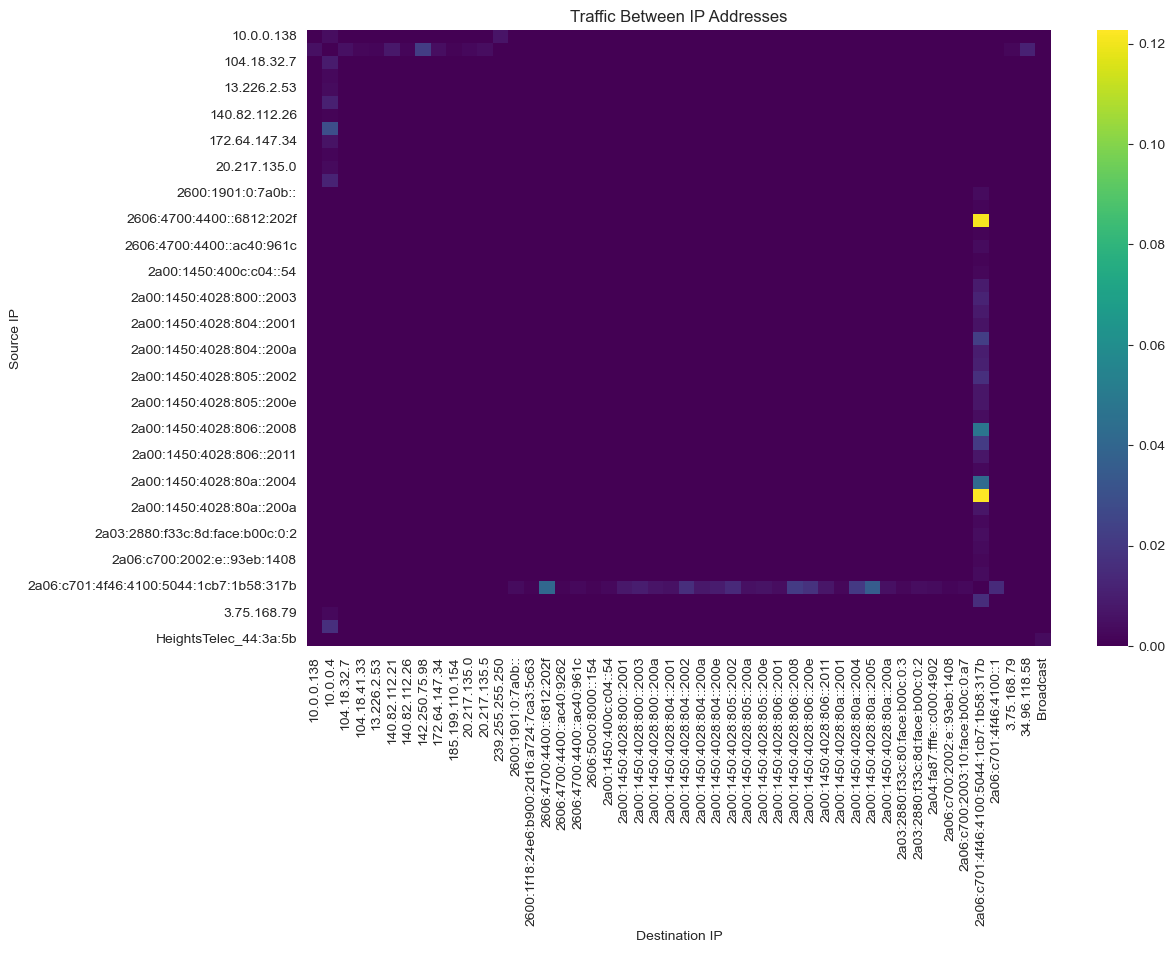

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total traffic
total_traffic = web_surfing_chrome.shape[0]

# Create the crosstab
heatmap_data = pd.crosstab(web_surfing_chrome['Source'], web_surfing_chrome['Destination'])

# Filter out addresses with traffic less than 0.01% of the total
threshold = total_traffic * 0.001
filtered_heatmap_data = heatmap_data[heatmap_data > threshold].dropna(axis=0, how='all').dropna(axis=1, how='all')

# Calculate the ratio for each cell
ratio_heatmap_data = filtered_heatmap_data / total_traffic

# Fill NaN values with their real ratio
filled_heatmap_data = ratio_heatmap_data.fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filled_heatmap_data, cmap='viridis')
plt.title('Traffic Between IP Addresses')
plt.xlabel('Destination IP')
plt.ylabel('Source IP')
plt.show()

## Web Surfing Edge:

In [86]:
import pandas as pd
from datetime import datetime, timedelta

# Read the CSV file into a DataFrame
web_surfing_edge = pd.read_csv('web_surfing_2_edge.csv')

# Convert the 'Time' column to datetime with the correct format
web_surfing_edge['Time'] = pd.to_datetime(web_surfing_edge['Time'], format='%Y/%j %H:%M:%S.%f')

# Calculate the time difference from the start of the recording
start_time = web_surfing_edge['Time'].iloc[0]
web_surfing_edge['Time'] = web_surfing_edge['Time'] - start_time

# Convert the time difference to timedelta and format it
web_surfing_edge['Time'] = web_surfing_edge['Time'].apply(lambda x: timedelta(seconds=x.total_seconds()))

# Display the updated DataFrame
web_surfing_edge.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0 days 00:00:00,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2001:4cd0:dc00:1::684d:ca6b,UDP,97,61487 > 443 Len=35
1,2,0 days 00:00:00.000444,2001:4cd0:dc00:1::684d:ca6b,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,UDP,87,443 > 61487 Len=25
2,3,0 days 00:00:00.001446,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2001:4cd0:dc00:1::684d:ca6b,UDP,216,61487 > 443 Len=154
3,4,0 days 00:00:00.001859,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,2001:4cd0:dc00:1::684d:ca6b,UDP,216,61487 > 443 Len=154
4,5,0 days 00:00:00.002124,2a00:1450:400c:c0b::bc,2a06:c701:4f46:4100:5044:1cb7:1b58:317b,TCP,86,5228 > 49765 [ACK] Seq=1 Ack=1 Win=1045 Len=...


In [87]:
web_surfing_edge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25916 entries, 0 to 25915
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   No.          25916 non-null  int64          
 1   Time         25916 non-null  timedelta64[ns]
 2   Source       25916 non-null  object         
 3   Destination  25916 non-null  object         
 4   Protocol     25916 non-null  object         
 5   Length       25916 non-null  int64          
 6   Info         25915 non-null  object         
dtypes: int64(2), object(4), timedelta64[ns](1)
memory usage: 1.4+ MB


In [88]:
web_surfing_chrome.describe()

,No.,Time,Length
count,6994.000000,6994,6994.000000
mean,3497.500000,0 days 00:00:23.138665099,656.807120
std,2019.138224,0 days 00:00:10.371630297,1104.918279
min,1.000000,0 days 00:00:00,42.000000
25%,1749.250000,0 days 00:00:16.714548,86.000000
50%,3497.500000,0 days 00:00:21.460082500,139.000000
75%,5245.750000,0 days 00:00:31.954198,1292.000000
max,6994.000000,0 days 00:00:39.697814,16480.000000


C:\Users\brhva\anaconda3\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


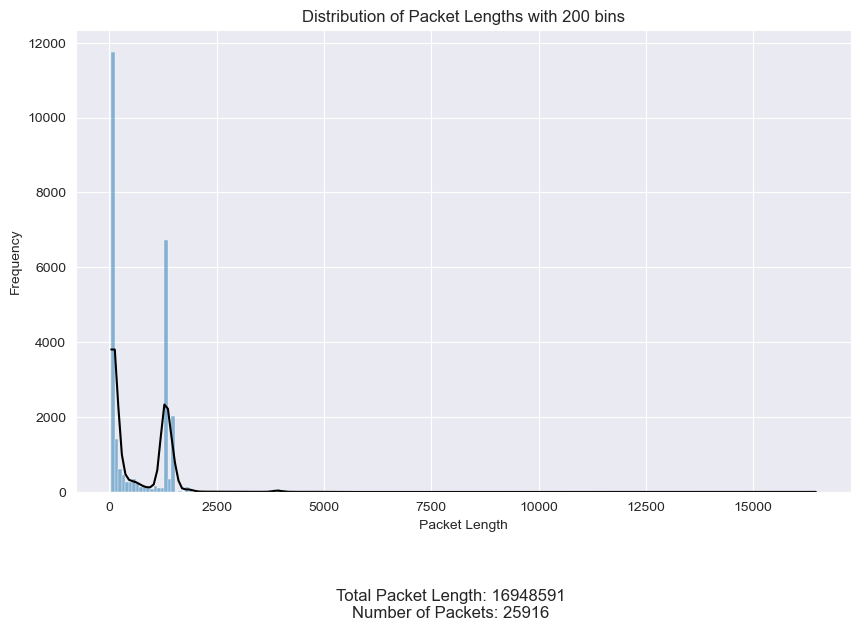

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace infinite values with NaN
web_surfing_edge.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Calculate the total sum of packet lengths and the number of packets
total_packet_length = web_surfing_edge['Length'].sum()
number_of_packets = web_surfing_edge['Length'].count()

# Create the histogram with KDE
plt.figure(figsize=(10, 6))
ax = sns.histplot(web_surfing_edge['Length'], bins=200, kde=True)

# Set the color of the KDE line to black
for line in ax.lines:
    line.set_color('black')

plt.title('Distribution of Packet Lengths with 200 bins')
plt.xlabel('Packet Length')
plt.ylabel('Frequency')

# Add text below the plot
plt.figtext(0.5, -0.1, f'Total Packet Length: {int(total_packet_length)}\nNumber of Packets: {number_of_packets}',
            ha='center', fontsize=12)

plt.show()

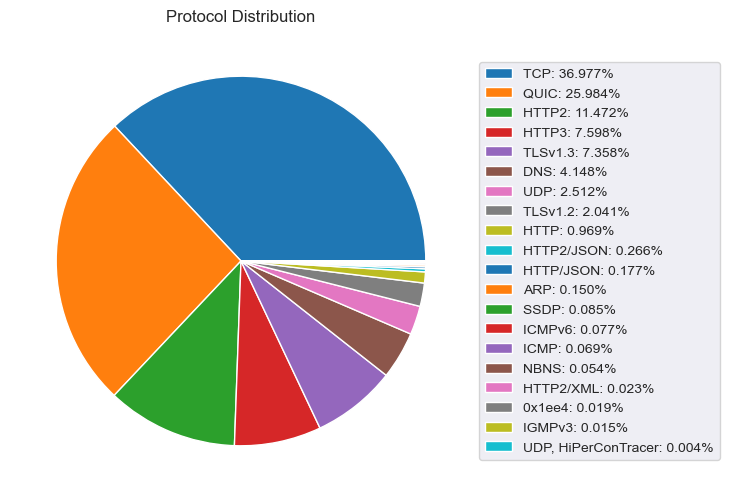

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate protocol counts and their percentages
protocol_counts = web_surfing_edge['Protocol'].value_counts()
protocol_percentages = protocol_counts / protocol_counts.sum() * 100

# Sort the protocol counts by percentage
sorted_protocols = protocol_percentages.sort_values(ascending=False)

# Create the pie chart
plt.figure(figsize=(10, 6))
ax = sorted_protocols.plot.pie(autopct=None, labels=['']*len(sorted_protocols))

# Add a legend with sorted protocol names and percentages
legend_labels = [f'{protocol}: {percentage:.3f}%' for protocol, percentage in sorted_protocols.items()]
ax.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Protocol Distribution')
plt.ylabel('')
plt.show()

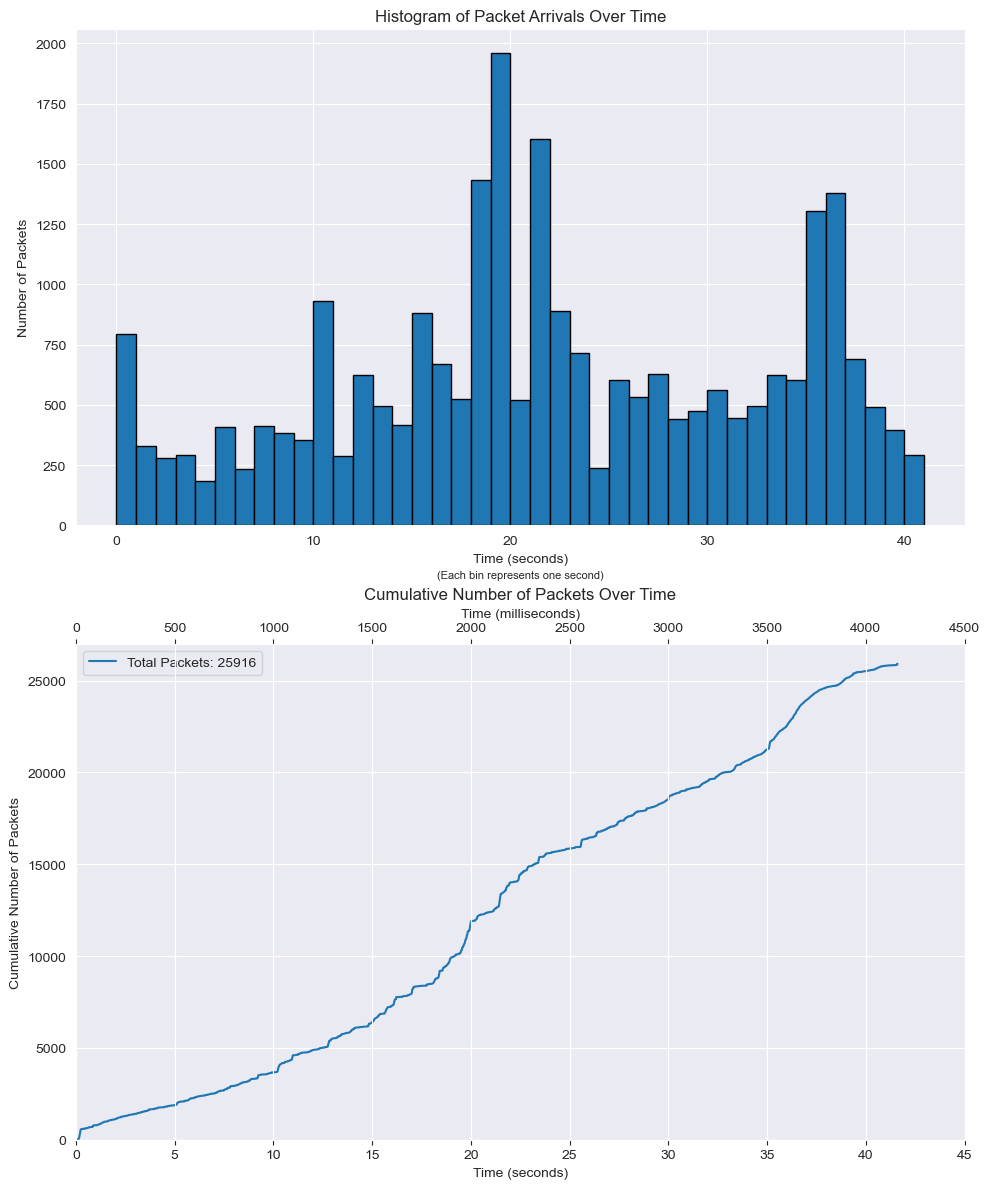

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Time' column is correctly referenced
if 'Time' in web_surfing_edge.columns:
    # Create a copy of the DataFrame for plotting
    plot_data = web_surfing_edge.copy()

    # Set the 'Time' column as the index in the copy
    plot_data.set_index('Time', inplace=True)

    # Convert 'Time' index to milliseconds and seconds
    plot_data['Time_ms'] = plot_data.index.total_seconds() * 1000
    plot_data['Time_s'] = plot_data.index.total_seconds()

    # Sort the index
    plot_data.sort_index(inplace=True)

    # Calculate the cumulative count of packets
    plot_data['Cumulative_Count'] = range(1, len(plot_data) + 1)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # Plot the histogram of packet arrivals with bins of 1 second
    ax1.hist(plot_data['Time_s'], bins=range(0, int(plot_data['Time_s'].max()) + 1), edgecolor='black')
    ax1.set_title('Histogram of Packet Arrivals Over Time')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Number of Packets')
    ax1.text(0.5, -0.1, '(Each bin represents one second)', ha='center', va='center', transform=ax1.transAxes, fontsize=8)

    # Plot the cumulative count of packets
    ax2.plot(plot_data['Time_s'], plot_data['Cumulative_Count'], label='Cumulative Count')
    ax2.set_title('Cumulative Number of Packets Over Time')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Cumulative Number of Packets')
    ax2.set_xlim(0, 45)
    ax2.set_ylim(0, 27000)
    total_packets = plot_data['Cumulative_Count'].max()
    ax2.legend([f'Total Packets: {total_packets}'])

    # Create a secondary x-axis for milliseconds
    ax2_sec = ax2.twiny()
    ax2_sec.set_xlim(0, 4500)
    ax2_sec.set_xlabel('Time (milliseconds)')

    # Display the plots
    plt.tight_layout()
    plt.show()
else:
    print("The 'Time' column is not found in the DataFrame.")

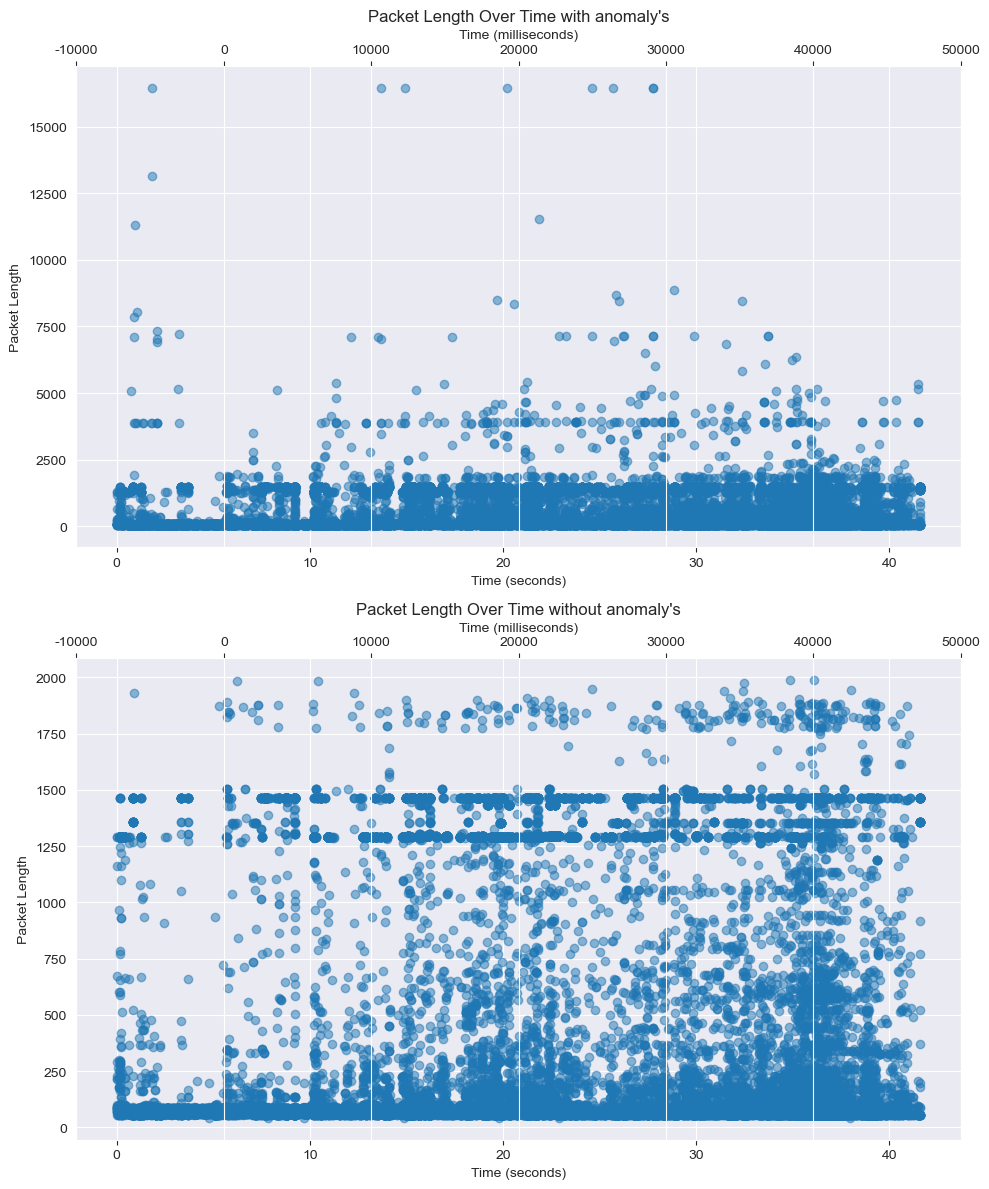

In [95]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Scatter Plot for all data
ax1.scatter(web_surfing_edge['Time'].dt.total_seconds(), web_surfing_edge['Length'], alpha=0.5)
ax1.set_title("Packet Length Over Time with anomaly's")
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Packet Length')

# Create a secondary x-axis for milliseconds
ax1_sec = ax1.twiny()
ax1_sec.set_xlim(ax1.get_xlim())
ax1_sec.set_xlabel('Time (milliseconds)')
ax1_sec.set_xticks(ax1.get_xticks())
ax1_sec.set_xticklabels([int(x * 1000) for x in ax1.get_xticks()])

# Filter data to ignore cases where packet length is larger than 2000
filtered_data = web_surfing_edge[web_surfing_edge['Length'] <= 2000]

# Scatter Plot for filtered data
ax2.scatter(filtered_data['Time'].dt.total_seconds(), filtered_data['Length'], alpha=0.5)
ax2.set_title("Packet Length Over Time without anomaly's")
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Packet Length')

# Create a secondary x-axis for milliseconds
ax2_sec = ax2.twiny()
ax2_sec.set_xlim(ax2.get_xlim())
ax2_sec.set_xlabel('Time (milliseconds)')
ax2_sec.set_xticks(ax2.get_xticks())
ax2_sec.set_xticklabels([int(x * 1000) for x in ax2.get_xticks()])

plt.tight_layout()
plt.show()

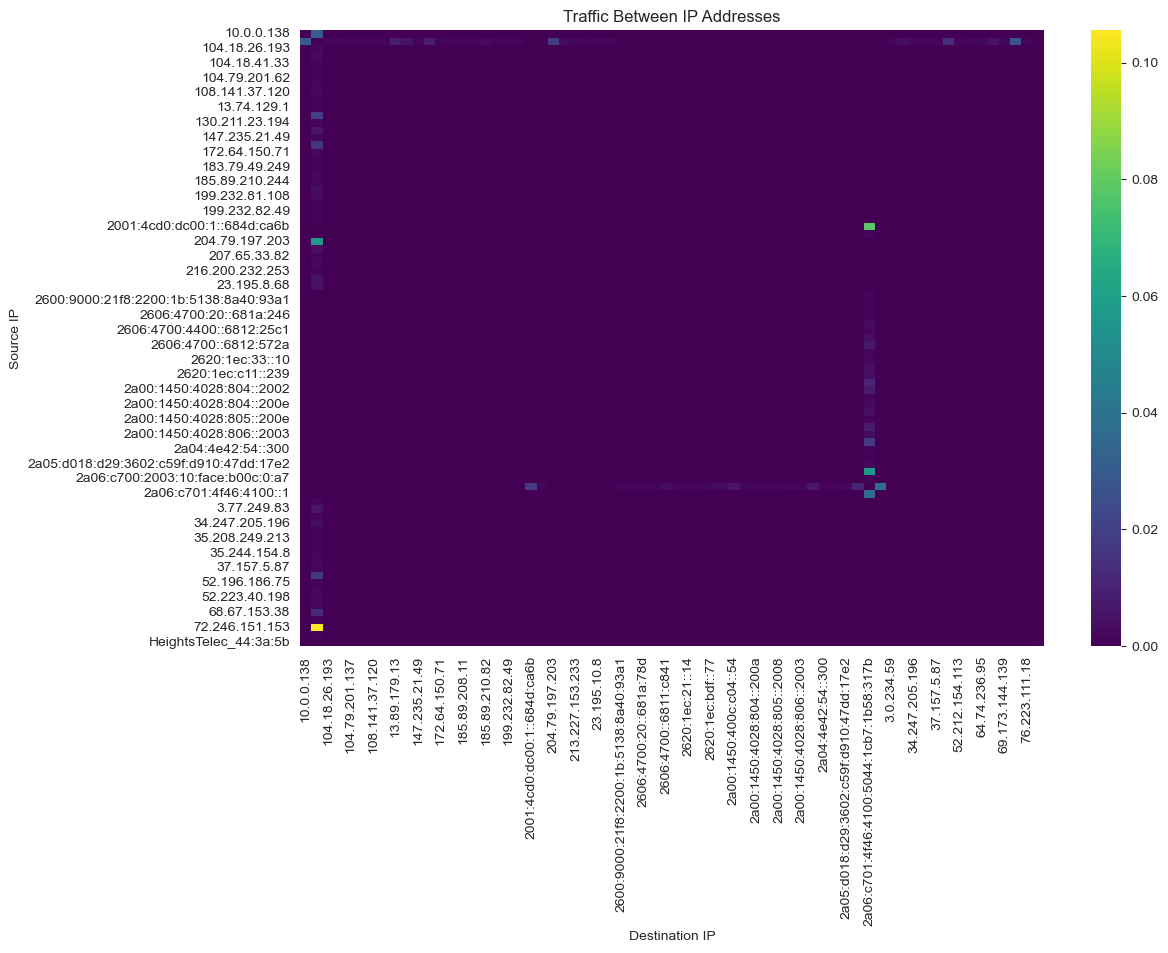

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total traffic
total_traffic = web_surfing_edge.shape[0]

# Create the crosstab
heatmap_data = pd.crosstab(web_surfing_edge['Source'], web_surfing_edge['Destination'])

# Filter out addresses with traffic less than 0.001% of the total
threshold = total_traffic * 0.001
filtered_heatmap_data = heatmap_data[heatmap_data > threshold].dropna(axis=0, how='all').dropna(axis=1, how='all')

# Calculate the ratio for each cell
ratio_heatmap_data = filtered_heatmap_data / total_traffic

# Fill NaN values with their real ratio
filled_heatmap_data = ratio_heatmap_data.fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filled_heatmap_data, cmap='viridis')
plt.title('Traffic Between IP Addresses')
plt.xlabel('Destination IP')
plt.ylabel('Source IP')
plt.show()